In [1]:
# imports and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

import prepare

# supress scientific notation
np.set_printoptions(suppress=True)

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = 78
pd.options.display.max_rows = 60

# visualization settings
plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=16)
plt.style.use('seaborn-whitegrid')

In [2]:
df = pd.read_csv('PlayerData.csv', index_col = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 2087
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   PlayerID                               371 non-null    int64  
 1   Player_Name                            371 non-null    object 
 2   Age                                    371 non-null    float64
 3   Height                                 368 non-null    float64
 4   MaxRank                                371 non-null    float64
 5   Hand                                   371 non-null    object 
 6   Country                                371 non-null    object 
 7   win_count                              371 non-null    float64
 8   lose_count                             371 non-null    float64
 9   match_count                            371 non-null    float64
 10  win%                                   371 non-null    float64
 11  aces_

In [3]:
df.sample(5)

,PlayerID,Player_Name,Age,Height,MaxRank,Hand,Country,win_count,lose_count,match_count,win%,aces_in_match_lost,aces_in_match_won,ace_count,aces_per_game,first_serve_percentage_match_lost,first_serve_percentage_match_won,first_serve_won_percentage_match_lost,first_serve_won_percentage_match_won,breakpoints_won_match_lost,breakpoints_won_match_won,breakpoint_count,breakpoints_per_game,win_count_30,loss_count_30,win_count_100,loss_count_100,total_top30_matches,total_top100_matches,top_30_win%,top_100_win%
134,101320,Magnus Gustafsson,32.271047,185.0,31.0,R,SWE,51.0,44.0,95.0,0.54,42.0,50.0,92.0,0.968,0.620464,0.618640,0.651711,0.762342,42.0,50.0,92.0,0.968421,4.0,12.0,31.0,36.0,16.0,67.0,0.250000,0.462687
61,102456,Felix Mantilla,24.607803,180.0,15.0,R,ESP,117.0,101.0,218.0,0.54,100.0,115.0,215.0,0.986,0.582649,0.593419,0.618552,0.734084,100.0,115.0,215.0,0.986239,28.0,38.0,82.0,81.0,66.0,163.0,0.424242,0.503067
475,103900,David Nalbandian,24.213552,180.0,3.0,R,ARG,282.0,145.0,427.0,0.66,140.0,262.0,402.0,0.941,0.578079,0.591423,0.619745,0.742596,140.0,262.0,402.0,0.941452,76.0,80.0,217.0,136.0,156.0,353.0,0.487179,0.614731
394,103240,Kevin Kim,26.576318,180.0,65.0,R,USA,33.0,70.0,103.0,0.32,70.0,33.0,103.0,1.000,0.573454,0.590820,0.657468,0.770557,70.0,33.0,103.0,1.000000,2.0,27.0,17.0,54.0,29.0,71.0,0.068966,0.239437
299,102247,Andrea Gaudenzi,28.153320,183.0,52.0,R,ITA,45.0,66.0,111.0,0.41,63.0,42.0,105.0,0.946,0.534832,0.606382,0.636617,0.727212,63.0,42.0,105.0,0.945946,9.0,26.0,31.0,57.0,35.0,88.0,0.257143,0.352273


In [4]:
# # change df cols to lower case
# # Column names: remove white spaces and convert to lower case
# df.columns = df.columns.str.strip().str.lower()
# df.columns

In [5]:
# # get rid of spaces in the columns names
# df.player_name= df.player_name.str.replace(' ', '_')
# df.player_name= df.player_name.str.lower()
# df.player_name

In [6]:
def prep_player_data(df):
    '''
    - gets rid of capital letters in the columns' names and players name
    - substitutes ' ' for '_' in players name
    '''
    df.columns = df.columns.str.strip().str.lower()
    df.player_name= df.player_name.str.replace(' ', '_')
    df.player_name= df.player_name.str.lower()
    
    return df
    

In [7]:
df = prep_player_data(df)
df.head()

,playerid,player_name,age,height,maxrank,hand,country,win_count,lose_count,match_count,win%,aces_in_match_lost,aces_in_match_won,ace_count,aces_per_game,first_serve_percentage_match_lost,first_serve_percentage_match_won,first_serve_won_percentage_match_lost,first_serve_won_percentage_match_won,breakpoints_won_match_lost,breakpoints_won_match_won,breakpoint_count,breakpoints_per_game,win_count_30,loss_count_30,win_count_100,loss_count_100,total_top30_matches,total_top100_matches,top_30_win%,top_100_win%
0,103720,lleyton_hewitt,20.752909,180.0,1.0,R,AUS,458.0,196.0,654.0,0.70,183.0,422.0,605.0,0.925,0.525558,0.539098,0.675974,0.773470,183.0,422.0,605.0,0.925076,134.0,110.0,351.0,184.0,244.0,535.0,0.549180,0.656075
1,102158,patrick_rafter,26.477755,185.0,2.0,R,AUS,97.0,44.0,141.0,0.69,40.0,86.0,126.0,0.894,0.637279,0.653328,0.700358,0.795185,40.0,86.0,126.0,0.893617,35.0,25.0,75.0,38.0,60.0,113.0,0.583333,0.663717
2,103017,nicolas_kiefer,22.535250,183.0,4.0,R,GER,217.0,162.0,379.0,0.57,150.0,205.0,355.0,0.937,0.514047,0.537990,0.689337,0.792370,150.0,205.0,355.0,0.936675,70.0,87.0,168.0,148.0,157.0,316.0,0.445860,0.531646
3,210013,martin_damm_sr,28.227242,188.0,67.0,R,CZE,19.0,32.0,51.0,0.37,31.0,19.0,50.0,0.980,0.546553,0.611743,0.693080,0.806999,31.0,19.0,50.0,0.980392,4.0,9.0,11.0,25.0,13.0,36.0,0.307692,0.305556
4,103264,mariano_puerta,26.904860,180.0,9.0,L,ARG,76.0,79.0,155.0,0.49,77.0,70.0,147.0,0.948,0.637432,0.680268,0.613399,0.746508,77.0,70.0,147.0,0.948387,11.0,33.0,55.0,71.0,44.0,126.0,0.250000,0.436508


In [8]:
df.playerid.duplicated().sum()

0

In [9]:
# players to analise 
rivals = ['roger_federer', 'rafael_nadal', 'novak_djokovic', 'andy_murray'] # Andy Roddick is not in the df   

In [10]:
roger_and_rivals = df[df['player_name'].isin(['roger_federer', 'rafael_nadal', 'novak_djokovic', 'andy_murray'])]
roger_and_rivals

,playerid,player_name,age,height,maxrank,hand,country,win_count,lose_count,match_count,win%,aces_in_match_lost,aces_in_match_won,ace_count,aces_per_game,first_serve_percentage_match_lost,first_serve_percentage_match_won,first_serve_won_percentage_match_lost,first_serve_won_percentage_match_won,breakpoints_won_match_lost,breakpoints_won_match_won,breakpoint_count,breakpoints_per_game,win_count_30,loss_count_30,win_count_100,loss_count_100,total_top30_matches,total_top100_matches,top_30_win%,top_100_win%
133,103819,roger_federer,22.485969,185.0,1.0,R,SUI,907.0,212.0,1119.0,0.81,202.0,866.0,1068.0,0.954,0.597457,0.629201,0.701538,0.796579,202.0,866.0,1068.0,0.954424,407.0,146.0,786.0,200.0,553.0,986.0,0.735986,0.797160
756,104745,rafael_nadal,22.228611,185.0,1.0,L,ESP,741.0,146.0,887.0,0.84,142.0,724.0,866.0,0.976,0.680257,0.683340,0.637243,0.748767,142.0,724.0,866.0,0.976325,339.0,109.0,643.0,136.0,448.0,779.0,0.756696,0.825417
997,104925,novak_djokovic,24.213552,188.0,1.0,R,SRB,670.0,143.0,813.0,0.82,134.0,645.0,779.0,0.958,0.635394,0.656273,0.653117,0.762887,134.0,645.0,779.0,0.958180,326.0,115.0,588.0,134.0,441.0,722.0,0.739229,0.814404
1075,104918,andy_murray,29.503080,190.0,1.0,R,GBR,496.0,158.0,654.0,0.76,154.0,476.0,630.0,0.963,0.559638,0.588219,0.668232,0.772850,154.0,476.0,630.0,0.963303,205.0,110.0,422.0,151.0,315.0,573.0,0.650794,0.736475


In [11]:
### create a player that is th average of rogers feder rivals 
rivals_df = df[df['player_name'].isin(['rafael_nadal', 'novak_djokovic', 'andy_murray'])]
rivals_df.mean()# will gi us the stats for the average top competitor for rafael nadal

playerid                                 104862.666667
age                                          25.315081
height                                      187.666667
maxrank                                       1.000000
win_count                                   635.666667
lose_count                                  149.000000
match_count                                 784.666667
win%                                          0.806667
aces_in_match_lost                          143.333333
aces_in_match_won                           615.000000
ace_count                                   758.333333
aces_per_game                                 0.965667
first_serve_percentage_match_lost             0.625097
first_serve_percentage_match_won              0.642611
first_serve_won_percentage_match_lost         0.652864
first_serve_won_percentage_match_won          0.761501
breakpoints_won_match_lost                  143.333333
breakpoints_won_match_won                   615.000000
breakpoint

In [12]:
# create the record of a player that is the average of the Nadals competition
median_record = {'playerid':'104862', 'player_name':'mean_rival', 'age':25.315081, 'height':188, 'maxrank':1, 'win_count':636, 'lose_count': 149,
                 'match_count':785, 'win%':0.81, 'aces_in_match_lost':143.33, 'aces_in_match_won':615,
                 'ace_count':758.33, 'aces_per_game':0.965667, 'first_serve_percentage_match_lost':0.625097,
                 'first_serve_percentage_match_won':0.642611,'first_serve_won_percentage_match_lost':0.652864,
                 'first_serve_won_percentage_match_won':0.761501, 'breakpoints_won_match_lost':143.33,
                 'breakpoints_won_match_won':615, 'breakpoint_count':758.33, 'breakpoints_per_game':0.965936}

roger_and_rivals = roger_and_rivals.append(median_record, ignore_index=True)

In [13]:
roger_and_rivals

,playerid,player_name,age,height,maxrank,hand,country,win_count,lose_count,match_count,win%,aces_in_match_lost,aces_in_match_won,ace_count,aces_per_game,first_serve_percentage_match_lost,first_serve_percentage_match_won,first_serve_won_percentage_match_lost,first_serve_won_percentage_match_won,breakpoints_won_match_lost,breakpoints_won_match_won,breakpoint_count,breakpoints_per_game,win_count_30,loss_count_30,win_count_100,loss_count_100,total_top30_matches,total_top100_matches,top_30_win%,top_100_win%
0,103819,roger_federer,22.485969,185.0,1.0,R,SUI,907.0,212.0,1119.0,0.81,202.00,866.0,1068.00,0.954000,0.597457,0.629201,0.701538,0.796579,202.00,866.0,1068.00,0.954424,407.0,146.0,786.0,200.0,553.0,986.0,0.735986,0.797160
1,104745,rafael_nadal,22.228611,185.0,1.0,L,ESP,741.0,146.0,887.0,0.84,142.00,724.0,866.00,0.976000,0.680257,0.683340,0.637243,0.748767,142.00,724.0,866.00,0.976325,339.0,109.0,643.0,136.0,448.0,779.0,0.756696,0.825417
2,104925,novak_djokovic,24.213552,188.0,1.0,R,SRB,670.0,143.0,813.0,0.82,134.00,645.0,779.00,0.958000,0.635394,0.656273,0.653117,0.762887,134.00,645.0,779.00,0.958180,326.0,115.0,588.0,134.0,441.0,722.0,0.739229,0.814404
3,104918,andy_murray,29.503080,190.0,1.0,R,GBR,496.0,158.0,654.0,0.76,154.00,476.0,630.00,0.963000,0.559638,0.588219,0.668232,0.772850,154.00,476.0,630.00,0.963303,205.0,110.0,422.0,151.0,315.0,573.0,0.650794,0.736475
4,104862,mean_rival,25.315081,188.0,1.0,NaN,NaN,636.0,149.0,785.0,0.81,143.33,615.0,758.33,0.965667,0.625097,0.642611,0.652864,0.761501,143.33,615.0,758.33,0.965936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
roger_and_rivals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   playerid                               5 non-null      object 
 1   player_name                            5 non-null      object 
 2   age                                    5 non-null      float64
 3   height                                 5 non-null      float64
 4   maxrank                                5 non-null      float64
 5   hand                                   4 non-null      object 
 6   country                                4 non-null      object 
 7   win_count                              5 non-null      float64
 8   lose_count                             5 non-null      float64
 9   match_count                            5 non-null      float64
 10  win%                                   5 non-null      float64
 11  aces_in_ma

In [15]:
# change player id data type
# when adding mean_rival data types conflict
roger_and_rivals['playerid'] = roger_and_rivals.playerid.astype(int)
roger_and_rivals['maxrank'] = roger_and_rivals.maxrank.astype(int)
roger_and_rivals['player_name'] = roger_and_rivals.player_name.astype(str)

In [16]:
roger_and_rivals['hand'] = roger_and_rivals.hand.astype(str)
roger_and_rivals['country'] = roger_and_rivals.country.astype(str)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 2087
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   playerid                               371 non-null    int64  
 1   player_name                            371 non-null    object 
 2   age                                    371 non-null    float64
 3   height                                 368 non-null    float64
 4   maxrank                                371 non-null    float64
 5   hand                                   371 non-null    object 
 6   country                                371 non-null    object 
 7   win_count                              371 non-null    float64
 8   lose_count                             371 non-null    float64
 9   match_count                            371 non-null    float64
 10  win%                                   371 non-null    float64
 11  aces_

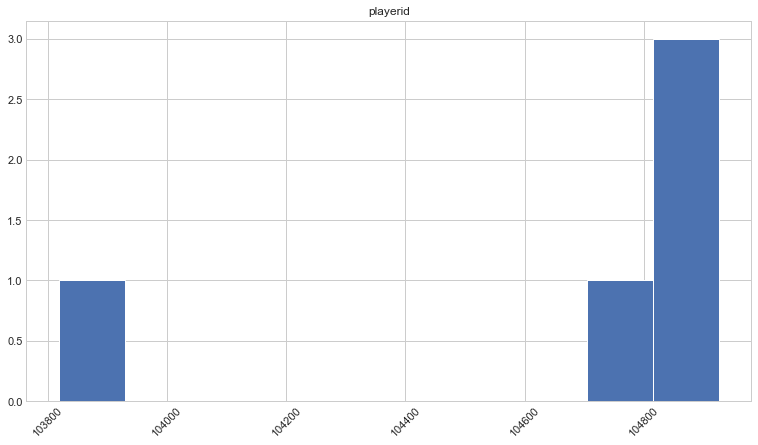

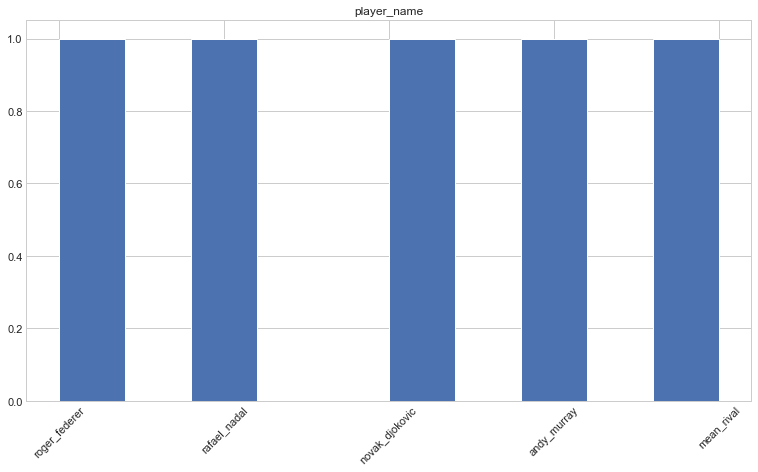

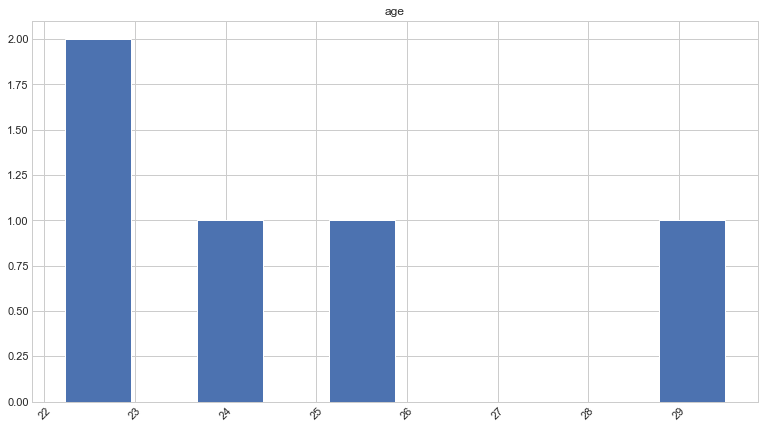

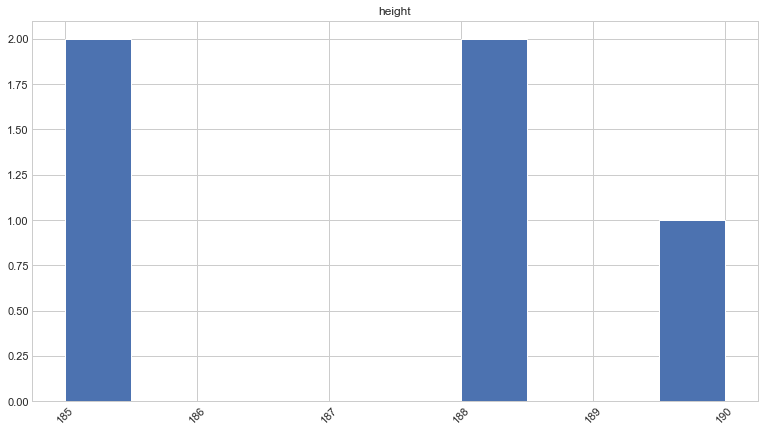

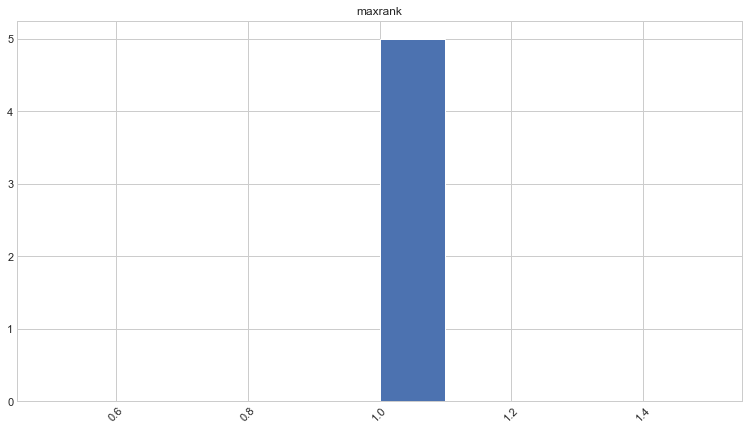

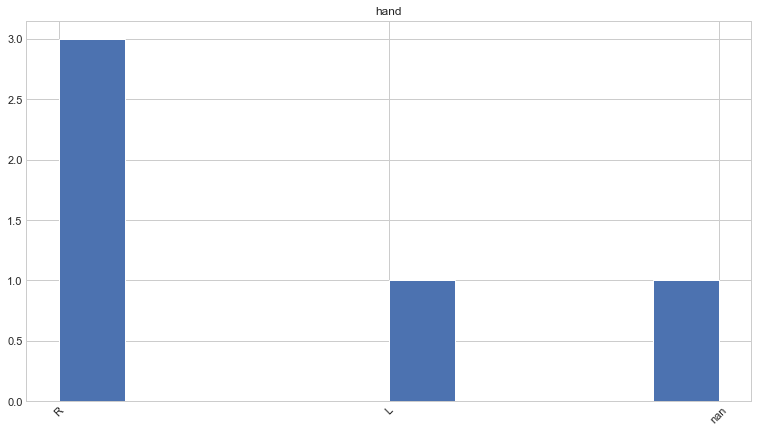

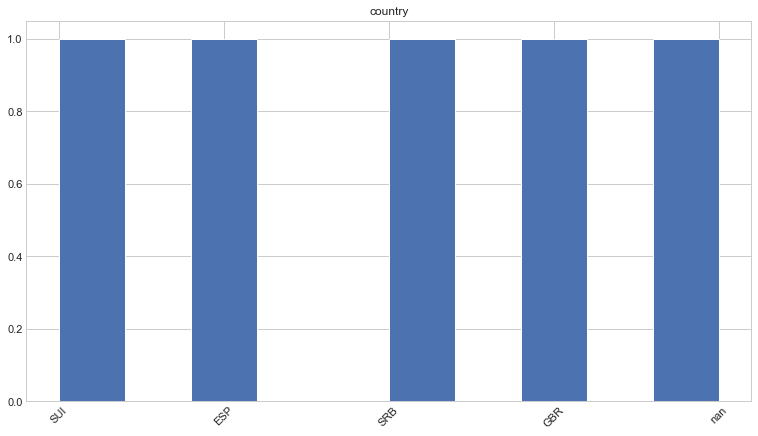

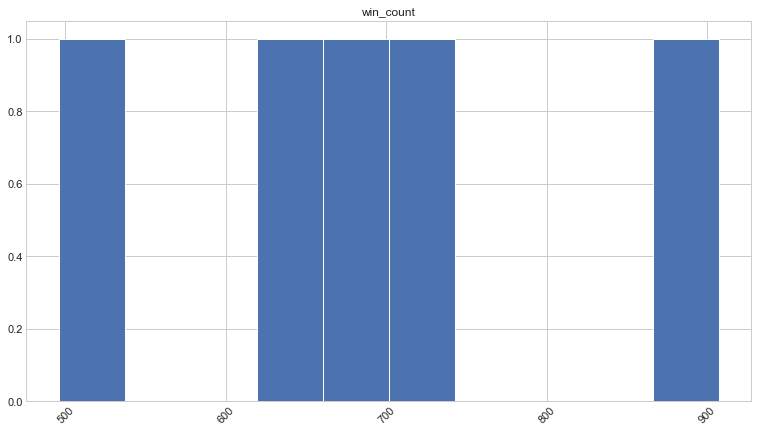

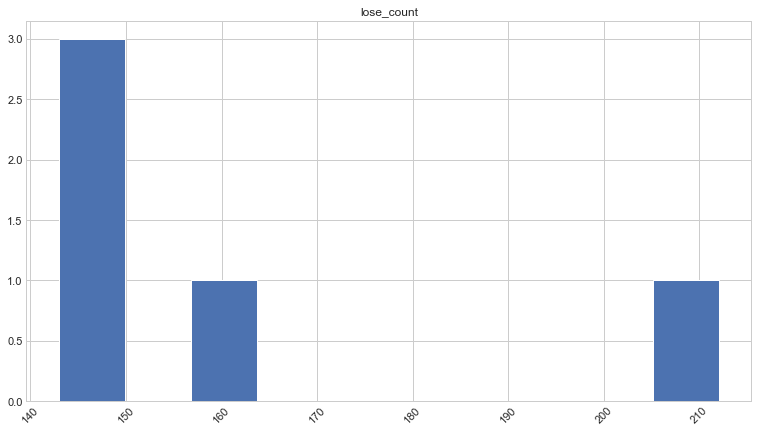

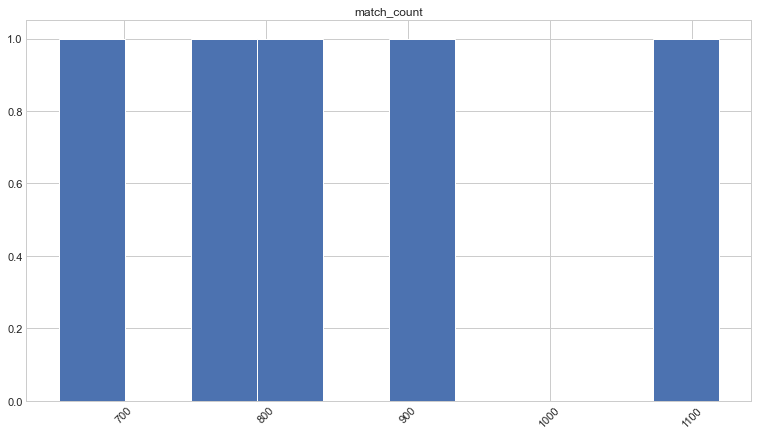

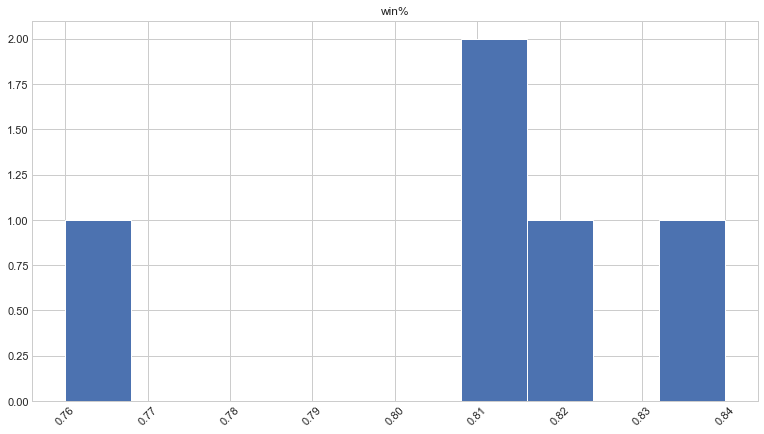

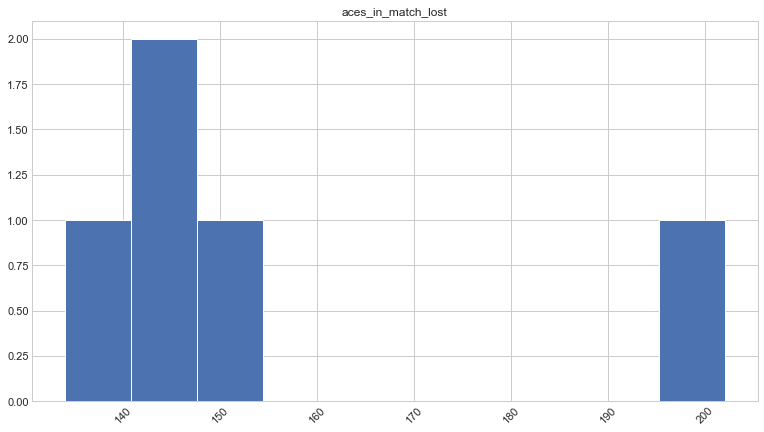

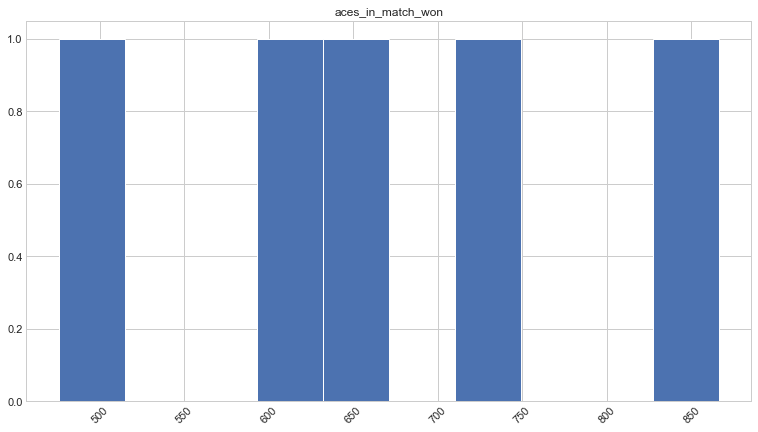

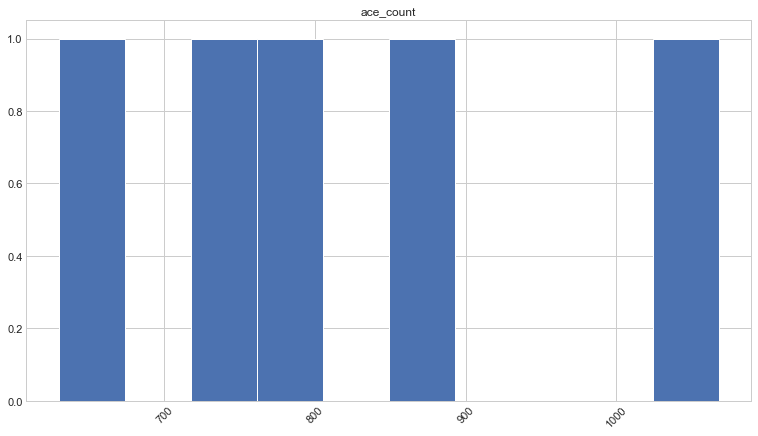

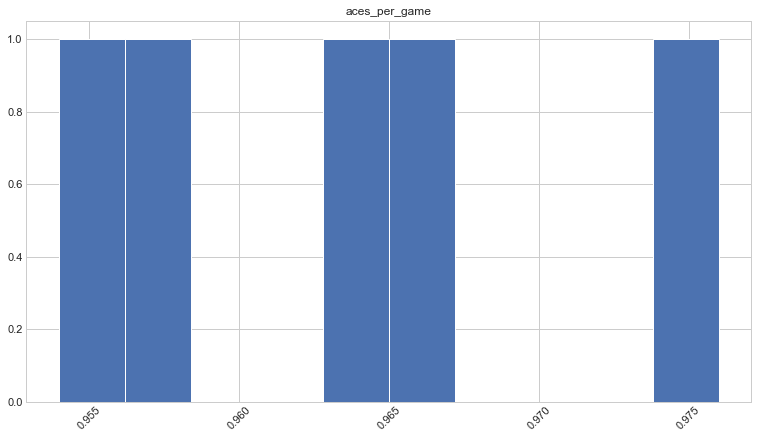

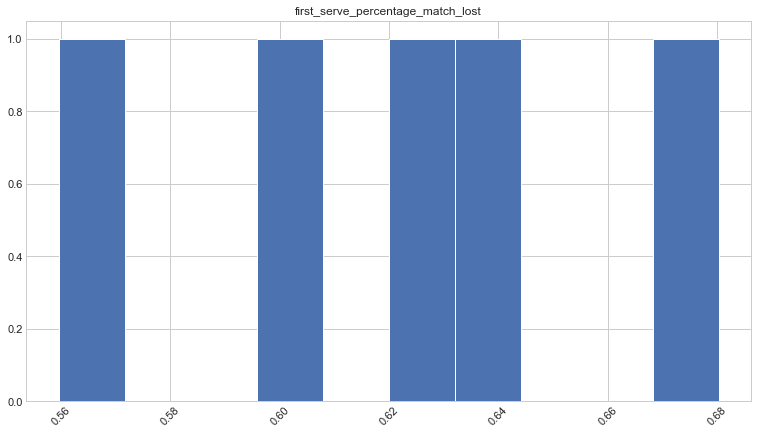

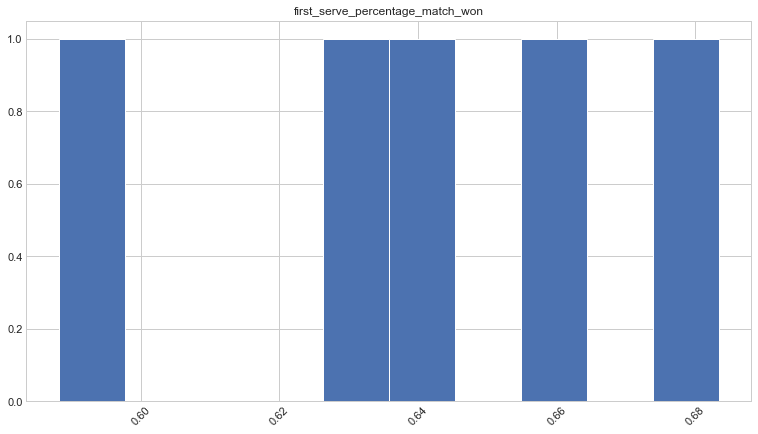

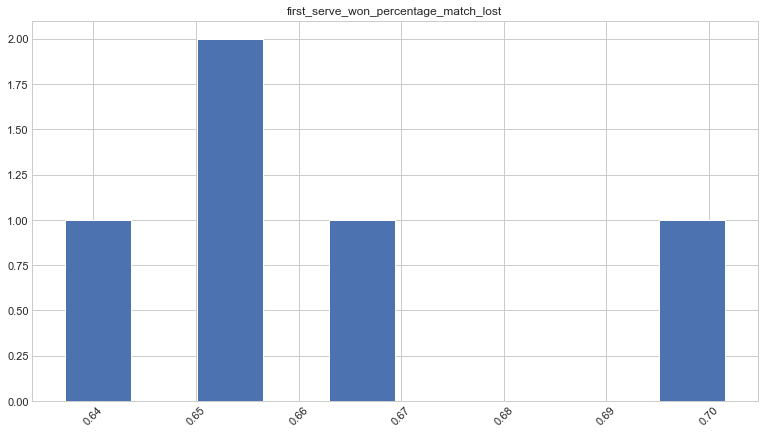

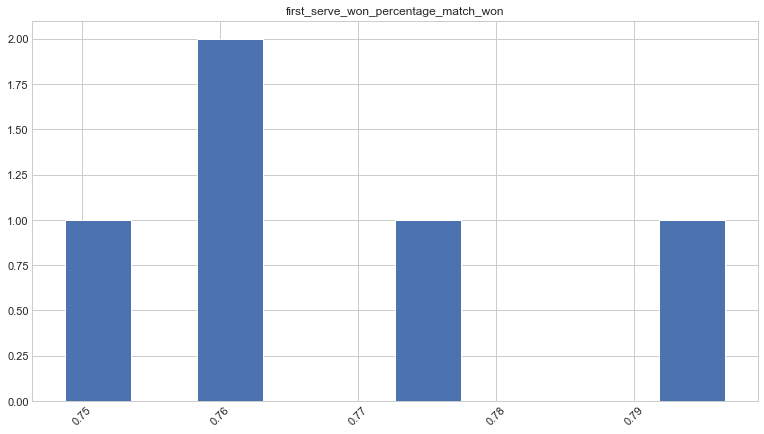

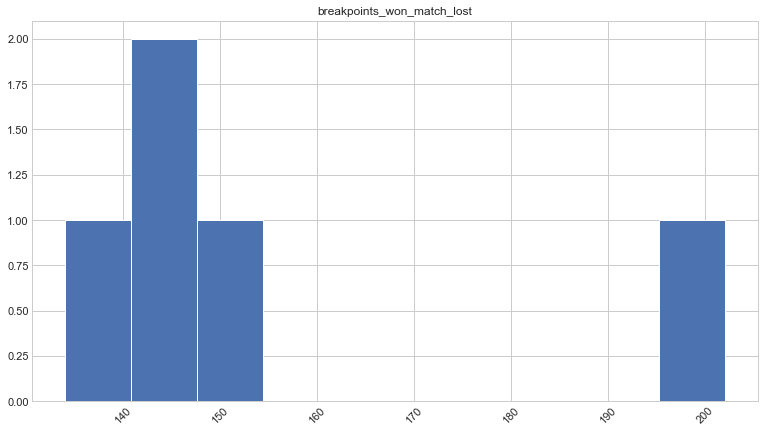

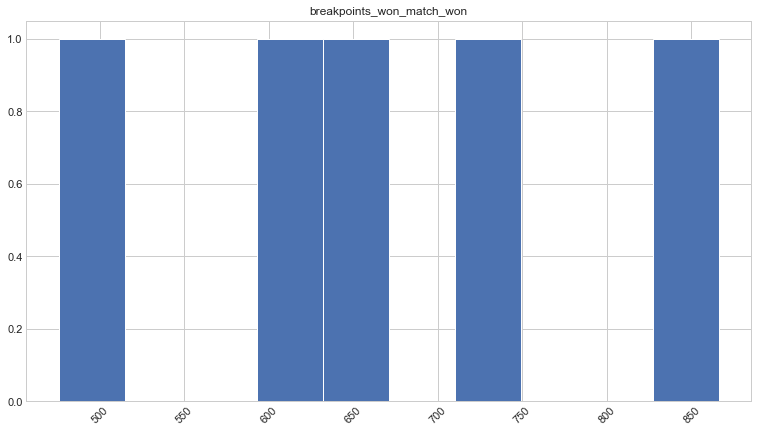

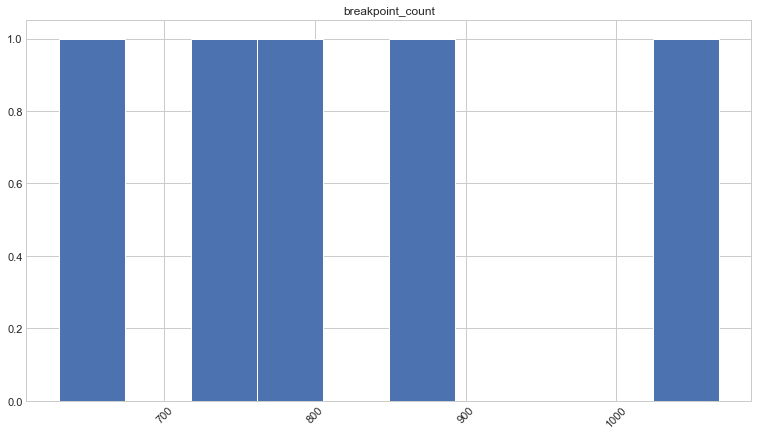

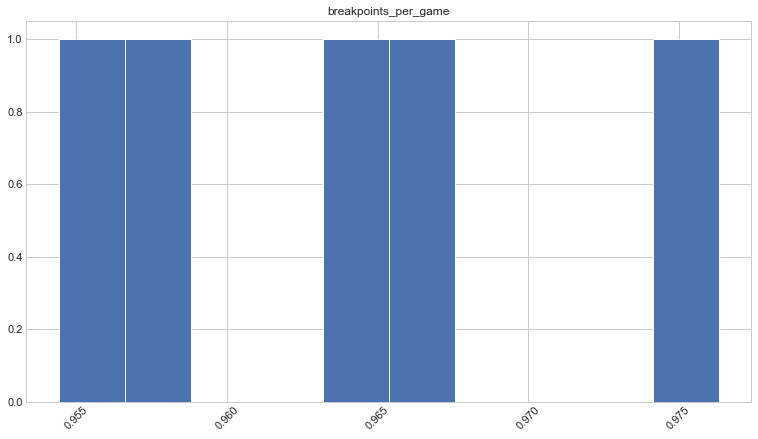

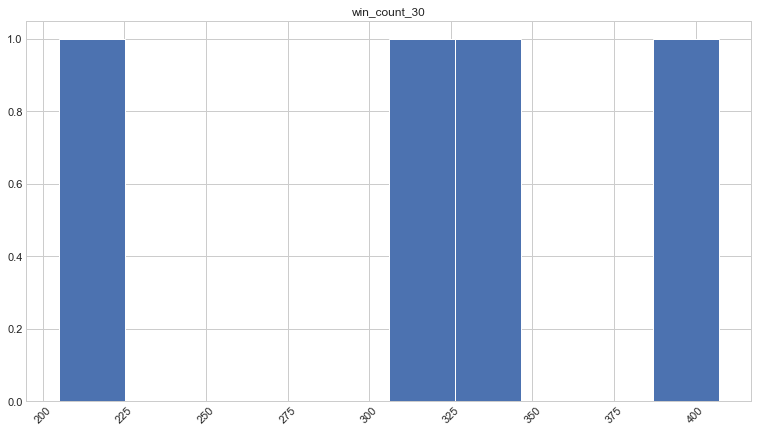

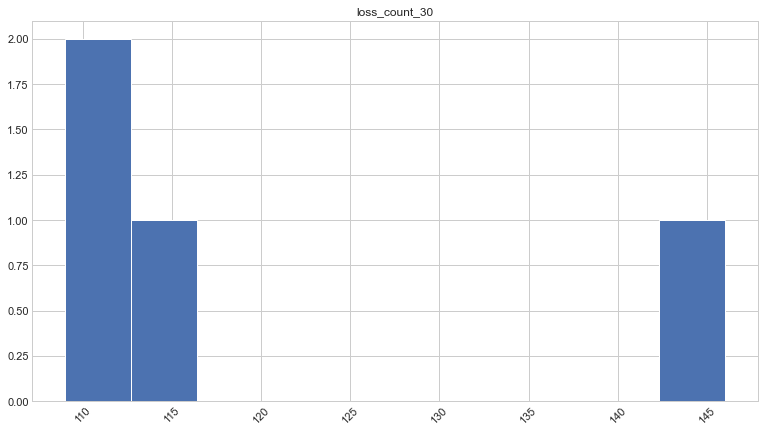

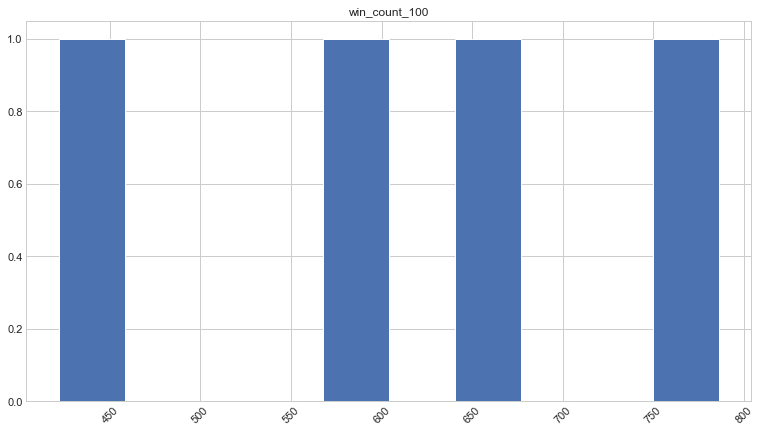

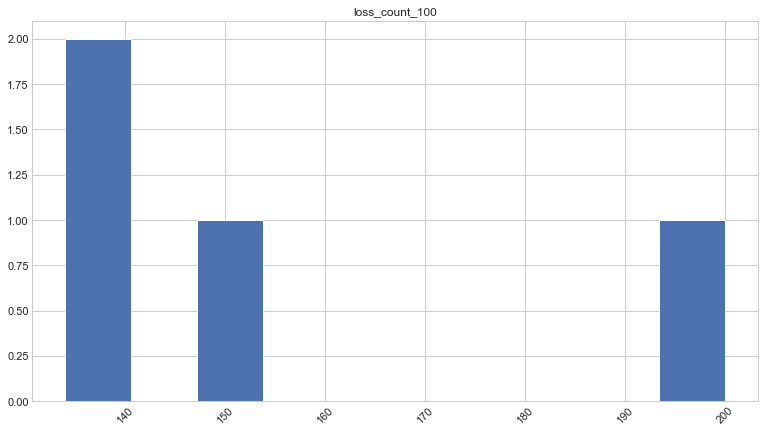

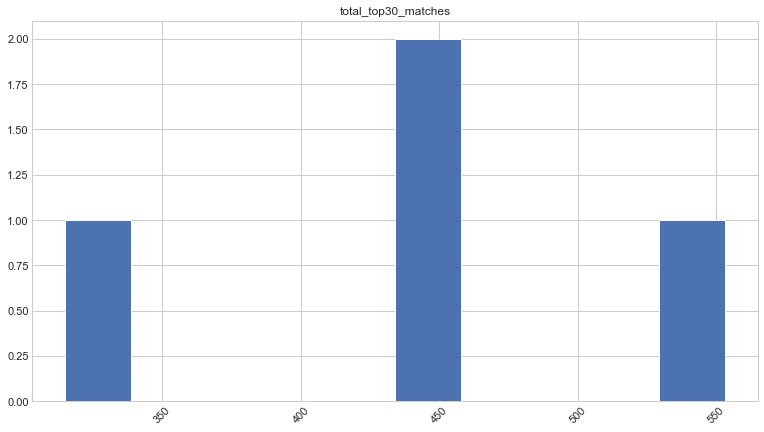

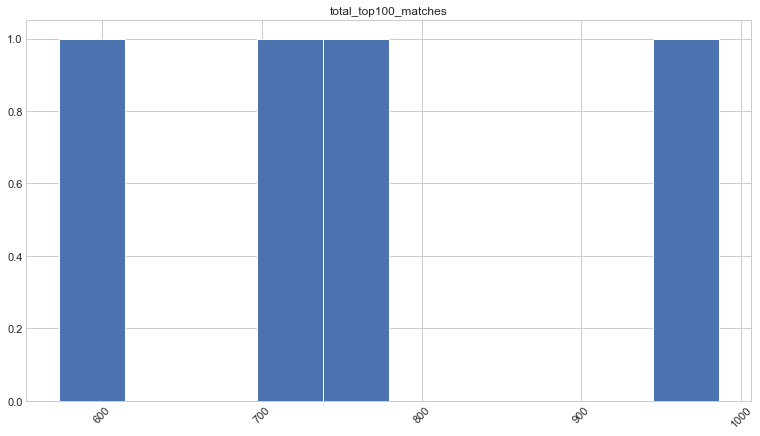

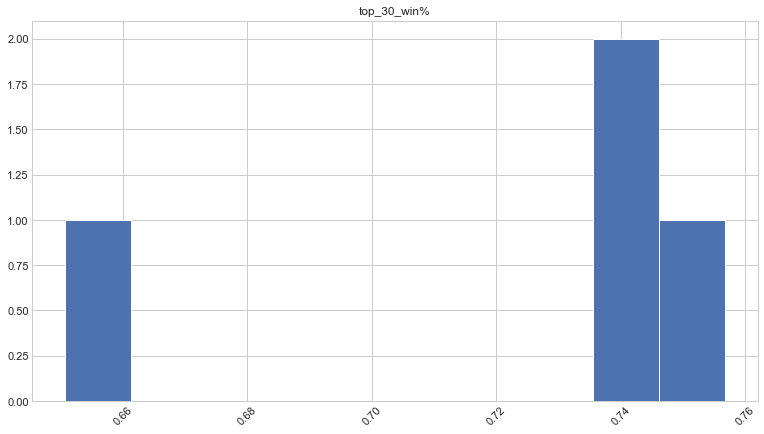

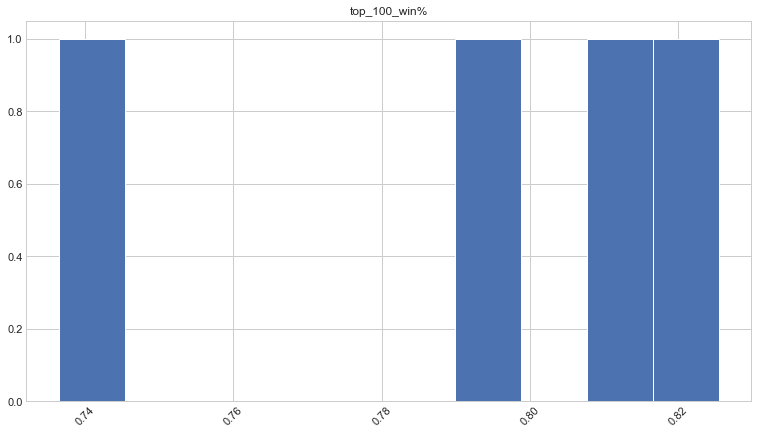

In [18]:
# visualize features for outliers
for col in roger_and_rivals:
    roger_and_rivals[col].hist()
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

In [19]:
df.describe().columns

Index(['playerid', 'age', 'height', 'maxrank', 'win_count', 'lose_count',
       'match_count', 'win%', 'aces_in_match_lost', 'aces_in_match_won',
       'ace_count', 'aces_per_game', 'first_serve_percentage_match_lost',
       'first_serve_percentage_match_won',
       'first_serve_won_percentage_match_lost',
       'first_serve_won_percentage_match_won', 'breakpoints_won_match_lost',
       'breakpoints_won_match_won', 'breakpoint_count', 'breakpoints_per_game',
       'win_count_30', 'loss_count_30', 'win_count_100', 'loss_count_100',
       'total_top30_matches', 'total_top100_matches', 'top_30_win%',
       'top_100_win%'],
      dtype='object')

In [20]:
#Create a datafreame that shows the fifference between roger_federer all the top rivals
rivals_difference = roger_and_rivals[['playerid', 'age', 'height', 'maxrank', 'win_count', 'lose_count',
       'match_count', 'win%', 'aces_in_match_lost', 'aces_in_match_won',
       'ace_count', 'aces_per_game', 'first_serve_percentage_match_lost',
       'first_serve_percentage_match_won',
       'first_serve_won_percentage_match_lost',
       'first_serve_won_percentage_match_won', 'breakpoints_won_match_lost',
       'breakpoints_won_match_won', 'breakpoint_count',
       'breakpoints_per_game']].diff()

In [21]:
roger_and_rivals

,playerid,player_name,age,height,maxrank,hand,country,win_count,lose_count,match_count,win%,aces_in_match_lost,aces_in_match_won,ace_count,aces_per_game,first_serve_percentage_match_lost,first_serve_percentage_match_won,first_serve_won_percentage_match_lost,first_serve_won_percentage_match_won,breakpoints_won_match_lost,breakpoints_won_match_won,breakpoint_count,breakpoints_per_game,win_count_30,loss_count_30,win_count_100,loss_count_100,total_top30_matches,total_top100_matches,top_30_win%,top_100_win%
0,103819,roger_federer,22.485969,185.0,1,R,SUI,907.0,212.0,1119.0,0.81,202.00,866.0,1068.00,0.954000,0.597457,0.629201,0.701538,0.796579,202.00,866.0,1068.00,0.954424,407.0,146.0,786.0,200.0,553.0,986.0,0.735986,0.797160
1,104745,rafael_nadal,22.228611,185.0,1,L,ESP,741.0,146.0,887.0,0.84,142.00,724.0,866.00,0.976000,0.680257,0.683340,0.637243,0.748767,142.00,724.0,866.00,0.976325,339.0,109.0,643.0,136.0,448.0,779.0,0.756696,0.825417
2,104925,novak_djokovic,24.213552,188.0,1,R,SRB,670.0,143.0,813.0,0.82,134.00,645.0,779.00,0.958000,0.635394,0.656273,0.653117,0.762887,134.00,645.0,779.00,0.958180,326.0,115.0,588.0,134.0,441.0,722.0,0.739229,0.814404
3,104918,andy_murray,29.503080,190.0,1,R,GBR,496.0,158.0,654.0,0.76,154.00,476.0,630.00,0.963000,0.559638,0.588219,0.668232,0.772850,154.00,476.0,630.00,0.963303,205.0,110.0,422.0,151.0,315.0,573.0,0.650794,0.736475
4,104862,mean_rival,25.315081,188.0,1,nan,nan,636.0,149.0,785.0,0.81,143.33,615.0,758.33,0.965667,0.625097,0.642611,0.652864,0.761501,143.33,615.0,758.33,0.965936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- feature engenirring will have to be made in order to have real comparison 
---

In [22]:
# Look at the .csv with all the games data using the prepare module
match = prepare.prepare_atp()
# df.drop(columns = 'Unnamed: 0', inplace=True)
match.sample(5)

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,player_1,player_2,player_1_age,player_2_age,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,player_1_aces,player_2_aces,player_1_double_faults,player_2_double_faults,player_1_service_points,player_2_service_points,player_1_first_serves_in,player_2_first_serves_in,player_1_first_serve_points_won,player_2_first_serve_points_won,player_1_second_serve_points_won,player_2_second_serve_points_won,player_1_service_game_total,player_2_service_game_total,player_1_break_points_saved,player_2_break_points_saved,player_1_break_points_faced,player_2_break_points_faced,winner,player_1_first_serve_%,player_2_first_serve_%,player_1_first_serve_win_%,player_2_first_serve_win_%,player_1_break_points_won,player_2_break_points_won,player_1_wins,surface_Clay,surface_Grass,surface_Hard,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,player_1_hand_R,player_2_hand_R,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-08-18,2003-441,Long Island,Hard,32,A,11,6-1 7-6(4),3,R32,81.0,James Blake,Jonas Bjorkman,23.638604,31.403149,NaN,NaN,R,R,185.0,183.0,103484,102035,USA,SWE,James Blake,Jonas Bjorkman,41.0,44.0,915.0,828.0,NaN,NaN,4.0,1.0,3.0,6.0,63.0,67.0,34.0,31.0,25.0,22.0,18.0,13.0,10.0,9.0,2.0,3.0,4.0,7.0,James Blake,0.539683,0.462687,0.735294,0.709677,4.0,2.0,True,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0
1999-02-22,1999-408,London,Carpet,32,A,19,6-3 6-4,3,R16,70.0,Nicolas Kiefer,Richard Krajicek,21.634497,27.214237,NaN,NaN,R,R,183.0,196.0,103017,101990,GER,NED,Nicolas Kiefer,Richard Krajicek,35.0,9.0,1073.0,2386.0,NaN,4.0,5.0,13.0,5.0,2.0,51.0,55.0,28.0,33.0,24.0,31.0,10.0,12.0,9.0,10.0,4.0,1.0,6.0,1.0,Richard Krajicek,0.549020,0.600000,0.857143,0.939394,0.0,2.0,False,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0
2011-04-24,2011-308,Munich,Clay,32,A,8,6-1 6-2,3,R32,60.0,Florian Mayer,Steve Darcis,27.553730,27.115674,NaN,Q,R,R,190.0,178.0,104252,104327,GER,BEL,Florian Mayer,Steve Darcis,35.0,136.0,1125.0,426.0,5.0,NaN,1.0,0.0,0.0,0.0,44.0,50.0,24.0,34.0,18.0,11.0,9.0,4.0,7.0,8.0,2.0,3.0,4.0,10.0,Florian Mayer,0.545455,0.680000,0.750000,0.323529,7.0,2.0,True,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
2001-01-08,2001-338,Sydney,Hard,32,A,28,6-4 6-1,3,QF,73.0,Fabrice Santoro,Lleyton Hewitt,28.082136,19.871321,NaN,NaN,R,R,178.0,180.0,102148,103720,FRA,AUS,Fabrice Santoro,Lleyton Hewitt,46.0,7.0,815.0,2560.0,NaN,2.0,4.0,0.0,2.0,1.0,66.0,46.0,37.0,24.0,19.0,18.0,12.0,15.0,9.0,8.0,6.0,1.0,11.0,2.0,Lleyton Hewitt,0.560606,0.521739,0.513514,0.750000,1.0,5.0,False,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0
2014-04-07,2014-360,Casablanca,Clay,28,A,23,7-5 7-6(4),3,QF,97.0,Benoit Paire,Guillermo Garcia Lopez,24.914442,30.841889,NaN,NaN,R,R,196.0,188.0,105332,104198,FRA,ESP,Benoit Paire,Guillermo Garcia Lopez,33.0,53.0,1155.0,866.0,3.0,8.0,3.0,0.0,5.0,5.0,75.0,77.0,31.0,48.0,22.0,34.0,16.0,13.0,12.0,12.0,1.0,3.0,6.0,7.0,Guillermo Garcia Lopez,0.413333,0.623377,0.709677,0.708333,4.0,5.0,False,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0


In [23]:
best_of_3 = match[match.best_of == 3]
best_of_5 = match[match.best_of == 5]
best_of_3

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,player_1,player_2,player_1_age,player_2_age,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,player_1_aces,player_2_aces,player_1_double_faults,player_2_double_faults,player_1_service_points,player_2_service_points,player_1_first_serves_in,player_2_first_serves_in,player_1_first_serve_points_won,player_2_first_serve_points_won,player_1_second_serve_points_won,player_2_second_serve_points_won,player_1_service_game_total,player_2_service_game_total,player_1_break_points_saved,player_2_break_points_saved,player_1_break_points_faced,player_2_break_points_faced,winner,player_1_first_serve_%,player_2_first_serve_%,player_1_first_serve_win_%,player_2_first_serve_win_%,player_1_break_points_won,player_2_break_points_won,player_1_wins,surface_Clay,surface_Grass,surface_Hard,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,player_1_hand_R,player_2_hand_R,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1999-01-11,1999-338,Sydney,Hard,32,A,16,7-6(1) 6-1,3,R32,84.0,Lleyton Hewitt,Patrick Rafter,17.878166,26.036961,NaN,NaN,R,R,180.0,185.0,103720,102158,AUS,AUS,Lleyton Hewitt,Patrick Rafter,104.0,4.0,456.0,3315.0,NaN,2.0,2.0,0.0,0.0,5.0,73.0,59.0,51.0,36.0,32.0,24.0,14.0,8.0,10.0,9.0,4.0,3.0,6.0,7.0,Lleyton Hewitt,0.698630,0.610169,0.627451,0.666667,4.0,2.0,True,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0
1999-01-11,1999-338,Sydney,Hard,32,A,15,5-7 6-3 6-2,3,R32,115.0,Martin Damm Sr,Nicolas Kiefer,26.444901,21.519507,Q,NaN,R,R,188.0,183.0,210013,103017,CZE,GER,Martin Damm Sr,Nicolas Kiefer,75.0,36.0,657.0,1007.0,NaN,NaN,8.0,6.0,2.0,4.0,84.0,86.0,52.0,38.0,40.0,31.0,11.0,32.0,14.0,15.0,3.0,2.0,6.0,3.0,Nicolas Kiefer,0.619048,0.441860,0.769231,0.815789,1.0,3.0,False,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0
1999-01-11,1999-338,Sydney,Hard,32,A,14,6-2 6-4,3,R32,61.0,Jan Siemerink,Mariano Puerta,28.744695,20.312115,NaN,NaN,L,L,183.0,180.0,101733,103264,NED,ARG,Jan Siemerink,Mariano Puerta,19.0,38.0,1664.0,983.0,NaN,NaN,1.0,1.0,7.0,1.0,51.0,46.0,24.0,31.0,15.0,25.0,14.0,11.0,9.0,9.0,3.0,0.0,6.0,0.0,Mariano Puerta,0.470588,0.673913,0.625000,0.806452,0.0,3.0,False,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1999-01-11,1999-338,Sydney,Hard,32,A,13,6-1 6-3,3,R32,43.0,Hicham Arazi,Todd Martin,25.229295,28.511978,NaN,NaN,L,R,175.0,198.0,102271,101774,MAR,USA,Hicham Arazi,Todd Martin,34.0,16.0,1069.0,1774.0,NaN,8.0,2.0,10.0,3.0,0.0,47.0,36.0,27.0,27.0,16.0,25.0,6.0,7.0,8.0,8.0,1.0,0.0,5.0,0.0,Todd Martin,0.574468,0.750000,0.592593,0.925926,0.0,4.0,False,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1999-01-11,1999-338,Sydney,Hard,32,A,12,6-3 7-6(4),3,R32,85.0,Carlos Moya,Thomas Johansson,22.373717,23.802875,NaN,NaN,R,R,190.0,180.0,102845,102563,ESP,SWE,Carlos Moya,Thomas Johansson,5.0,17.0,3159.0,1761.0,3.0,NaN,7.0,8.0,1.0,2.0,79.0,58.0,37.0,26.0,28.0,19.0,22.0,17.0,11.0,10.0,5.0,2.0,7.0,5.0,Carlos Moya,0.468354,0.448276,0.756757,0.730769,3.0,2.0,True,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-23,2019-M-DC-2019-FLS-M-GBR-ESP-01,Davis Cup Finals SF: GBR vs ESP,Hard,4,D,2,6-4 6-0,3,RR,85.0,Daniel Evans,Rafael Nadal,29.489391,33.459274,NaN,NaN,R,L,175.0,185.0,105554,104745,GBR,ESP,Daniel Evans,Rafael Nadal,42.0,1.0,1124.0,9985.0,NaN,NaN,4.0,9.0,2.0,0.0,59.0,46.0,43.0,29.0,24.0,24.0,5.0,11.0,8.0,8.0,5.0,0.0,9.0,0.0,Rafael Nadal,0.728814,0.630435,0.558140,0.827586,0.0,4.0,F

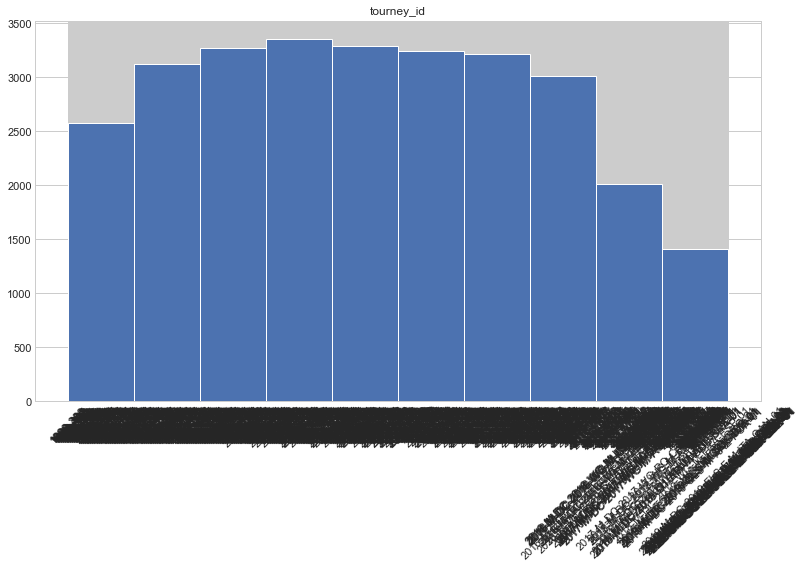

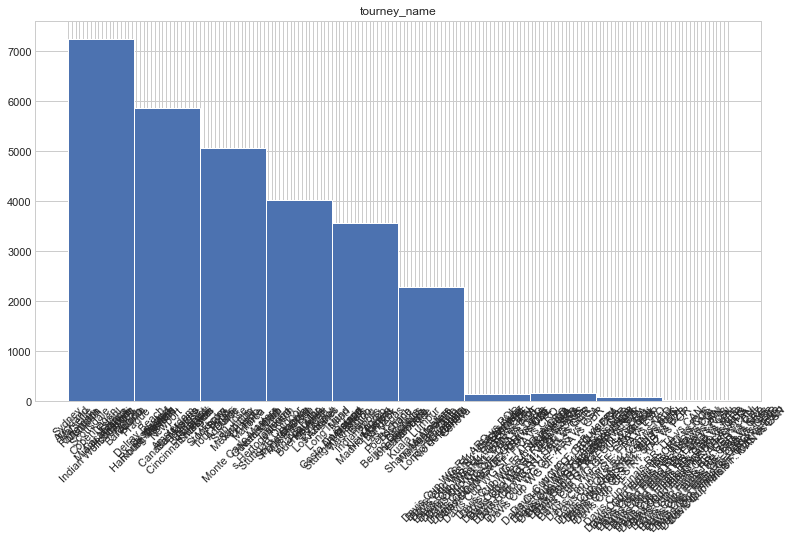

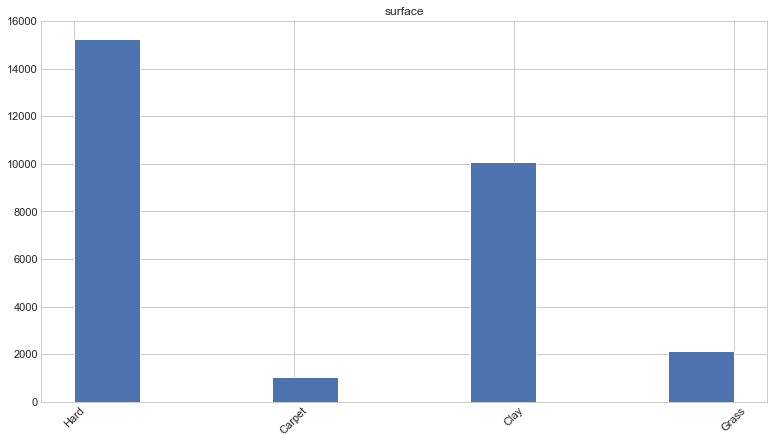

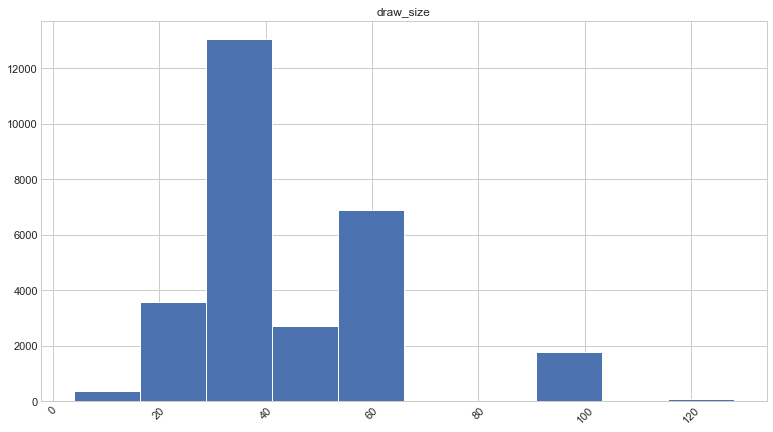

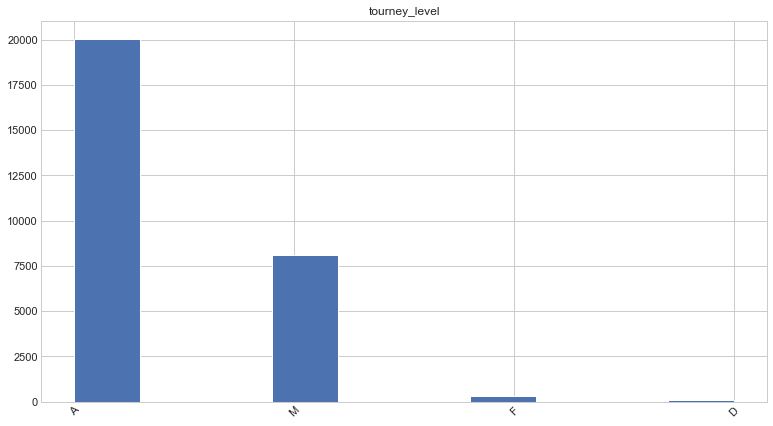

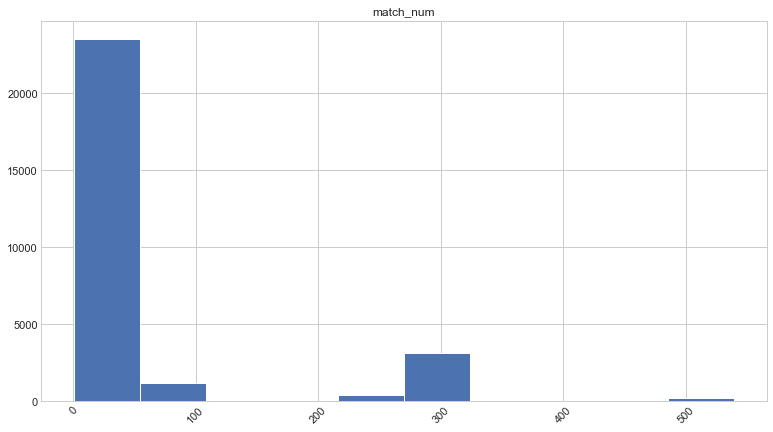

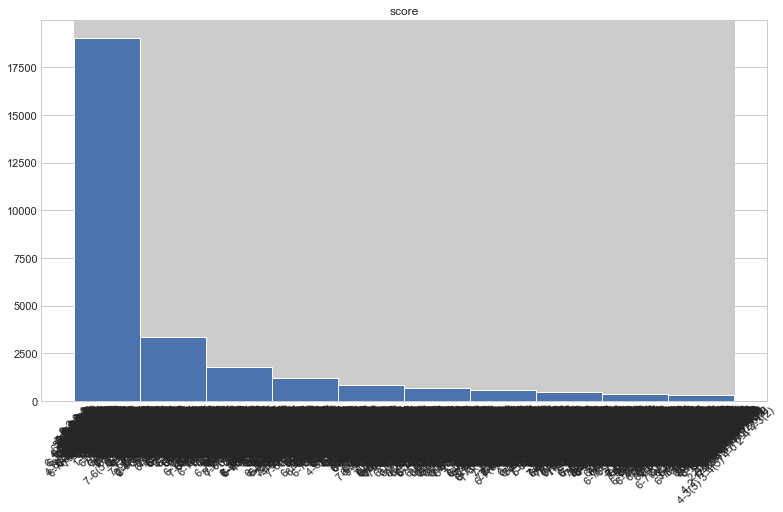

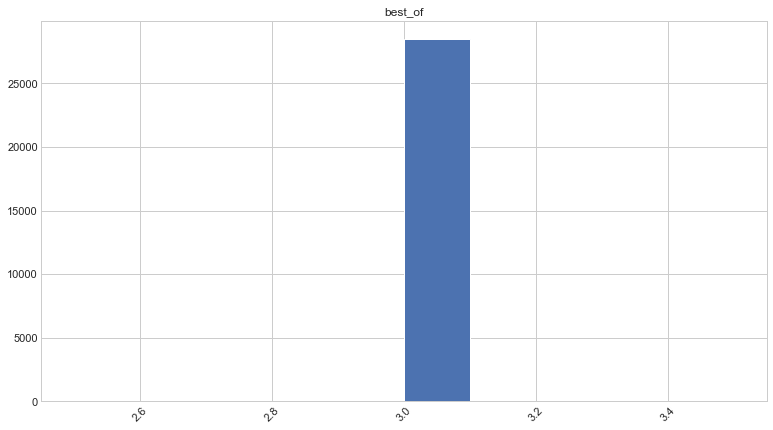

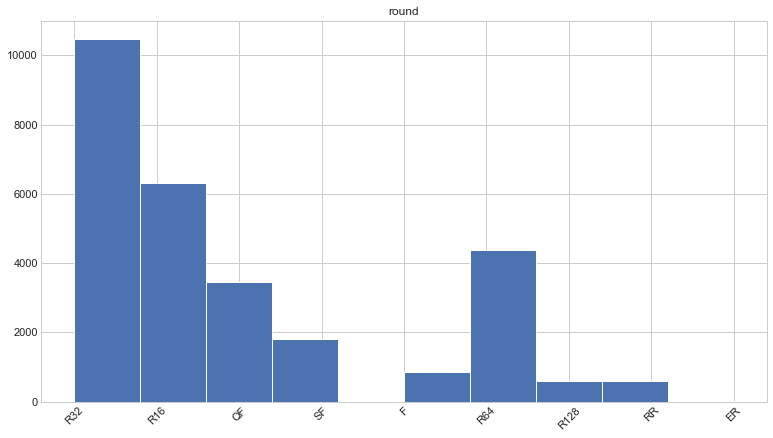

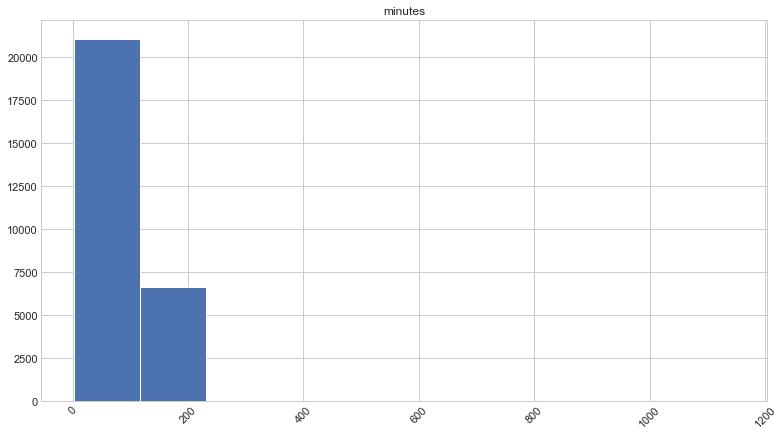

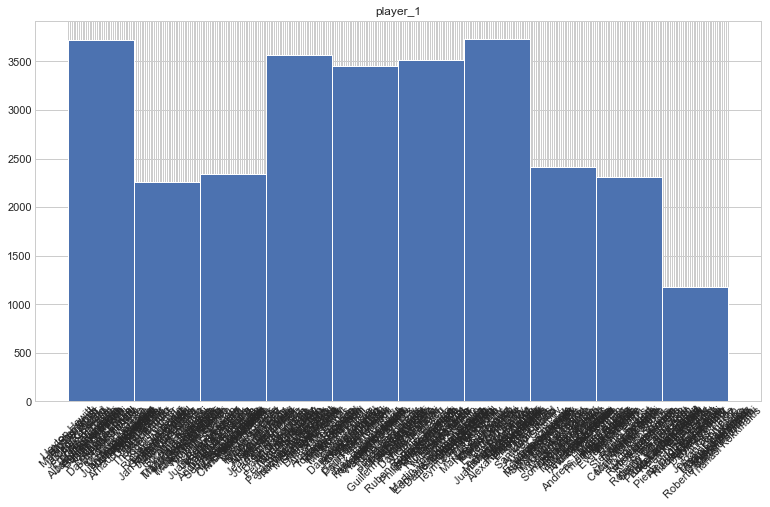

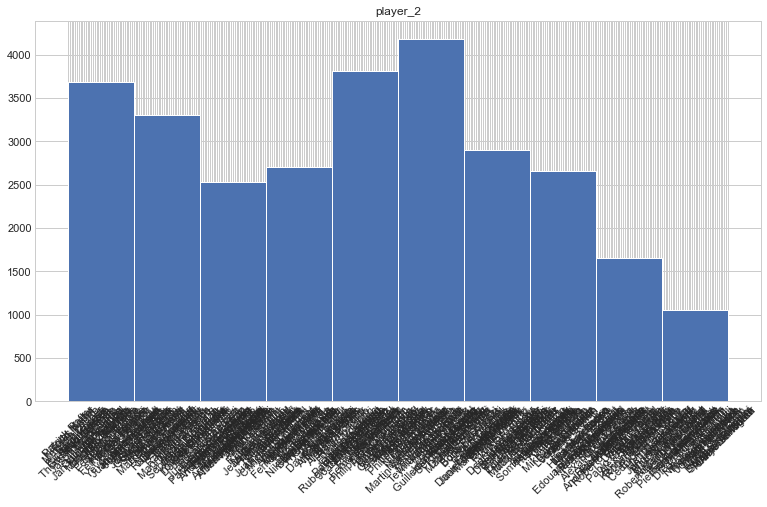

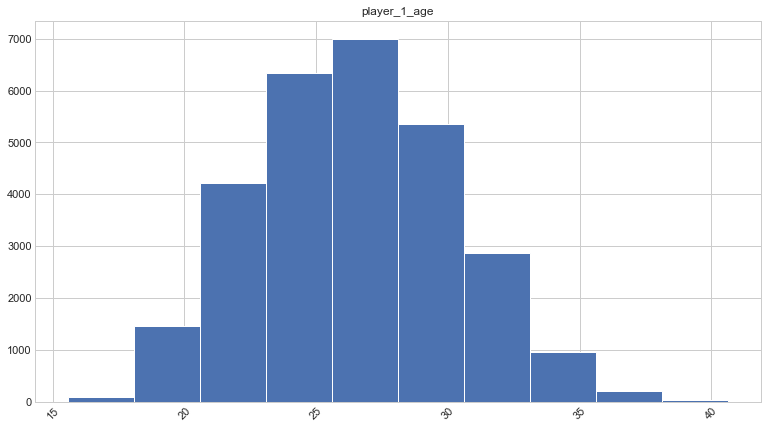

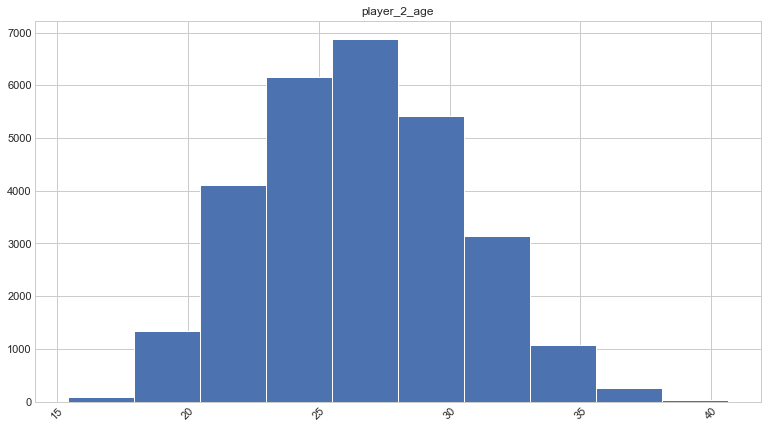

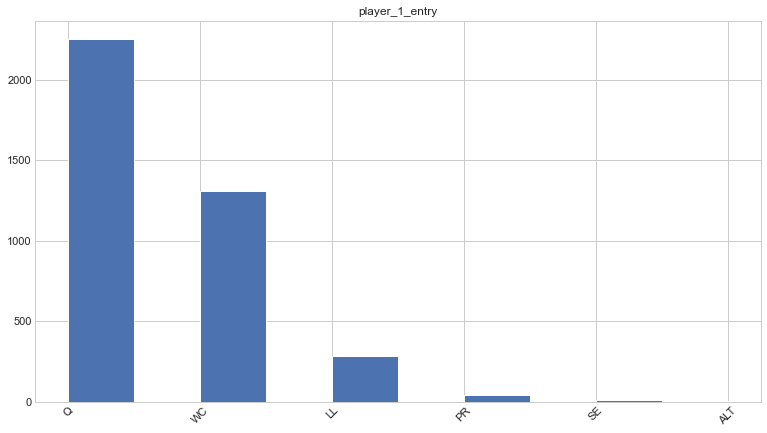

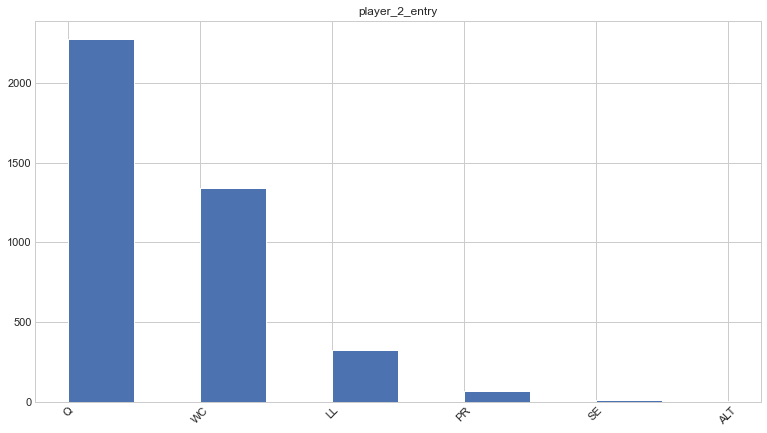

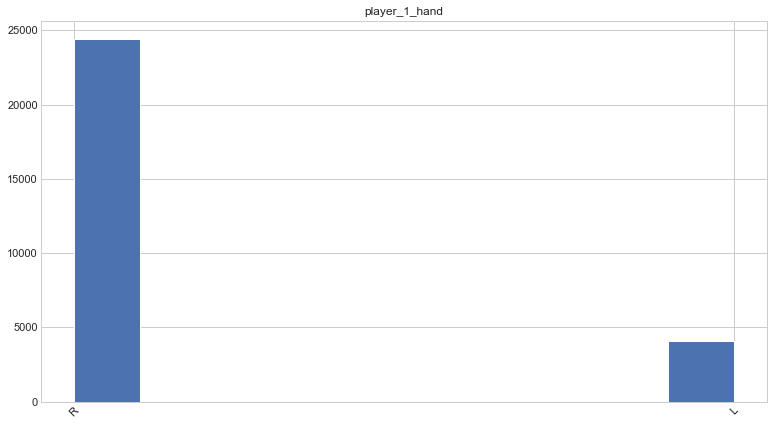

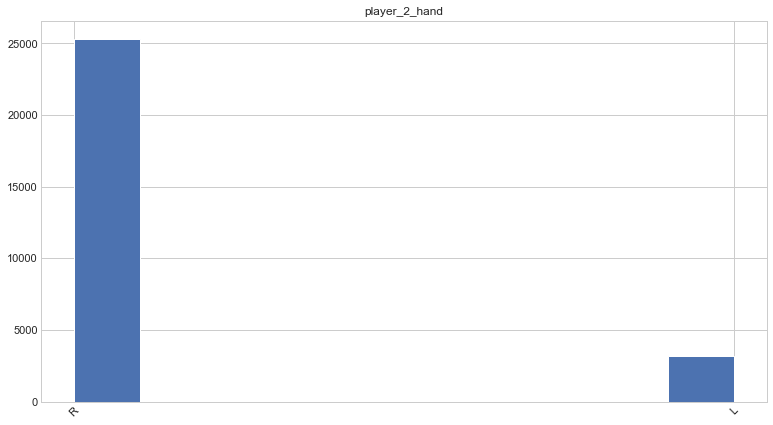

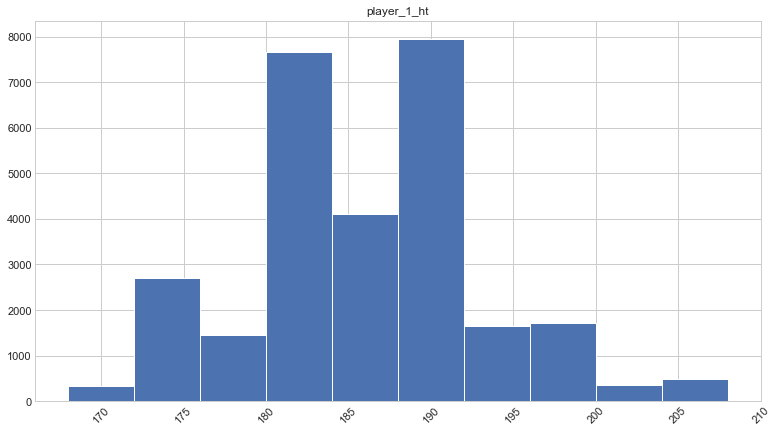

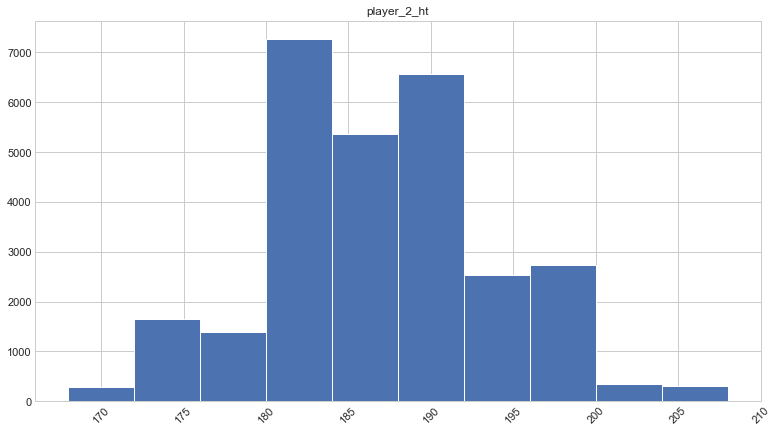

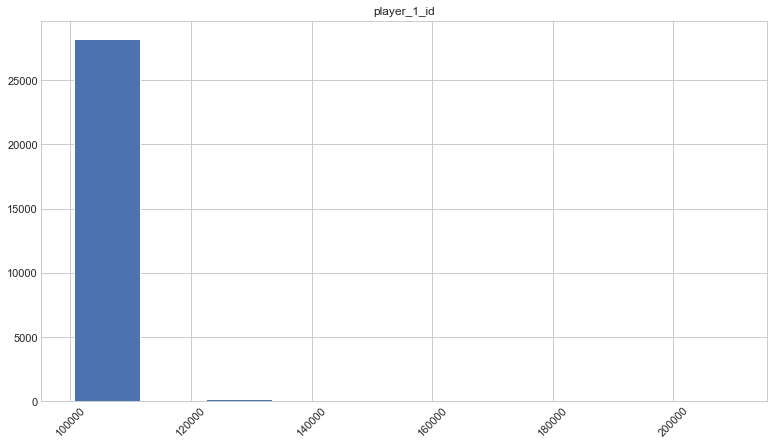

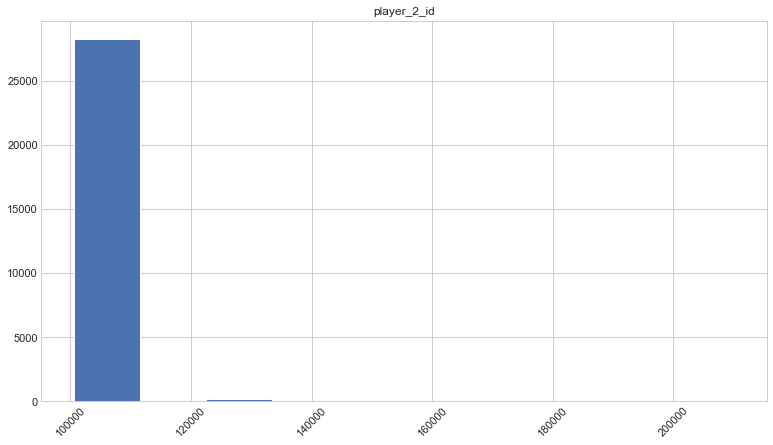

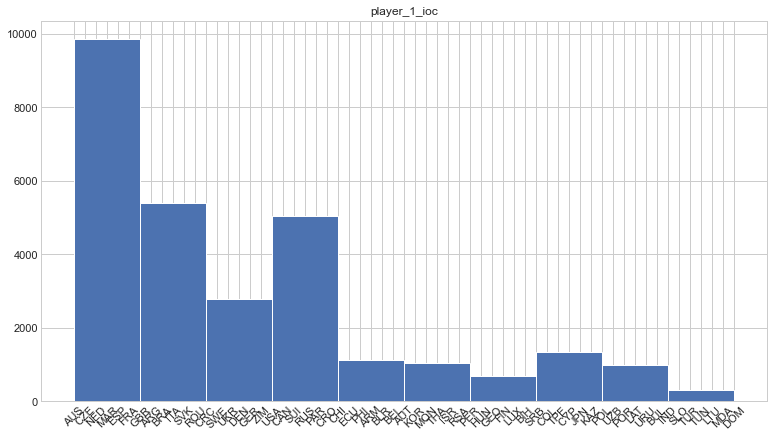

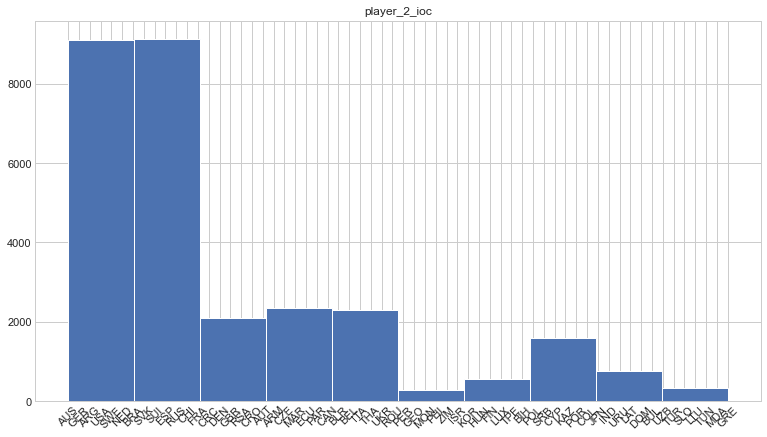

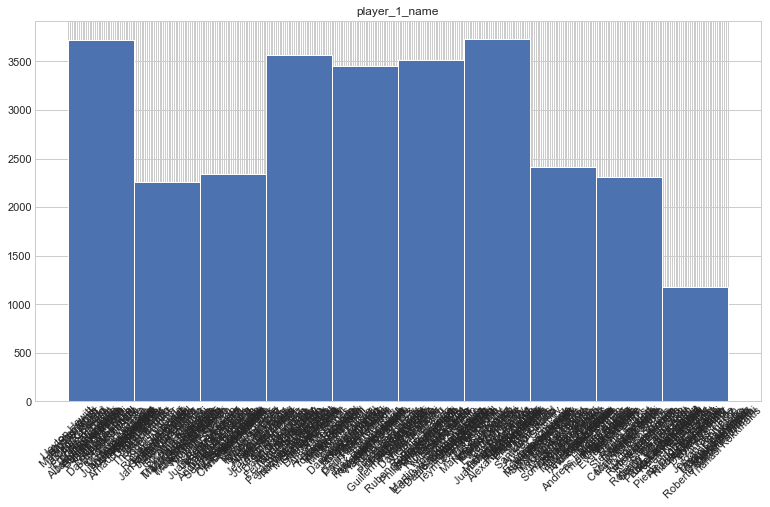

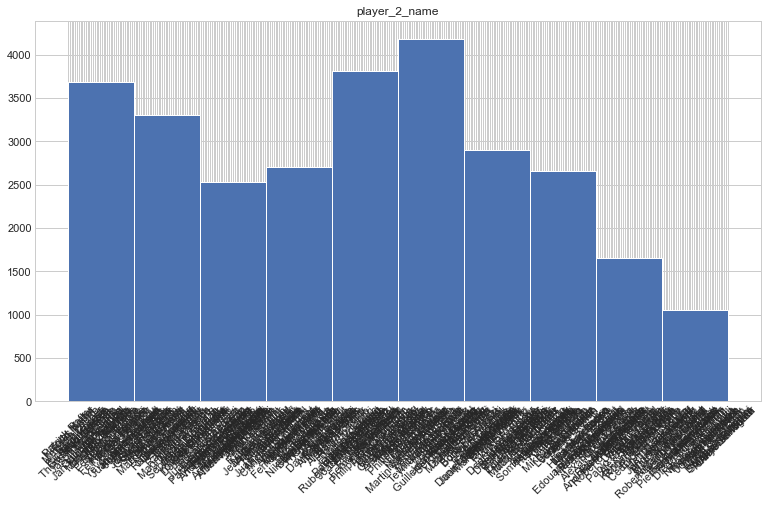

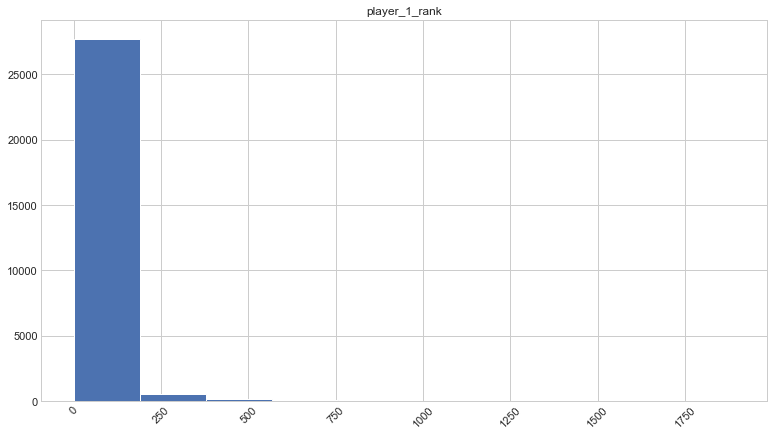

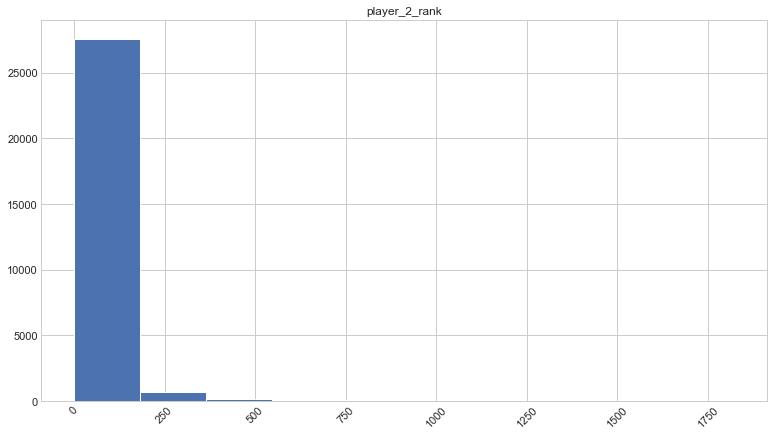

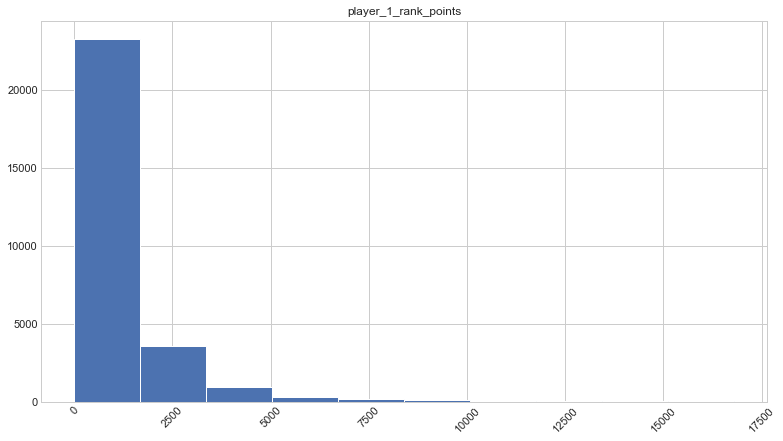

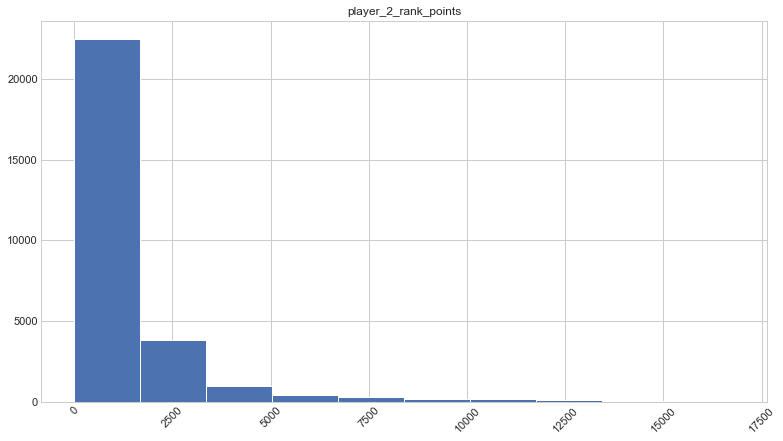

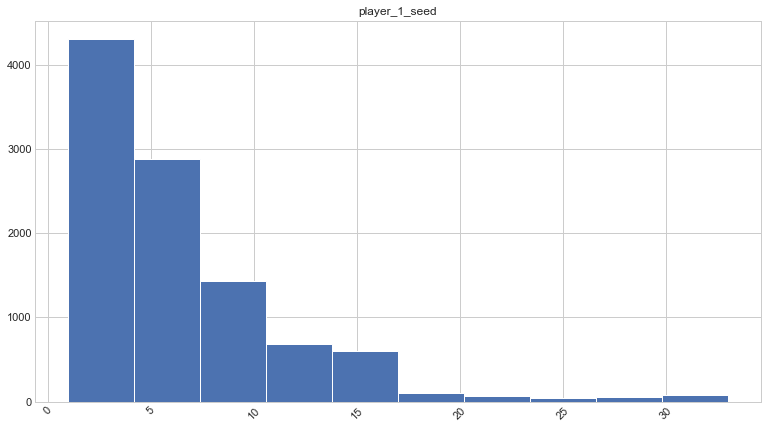

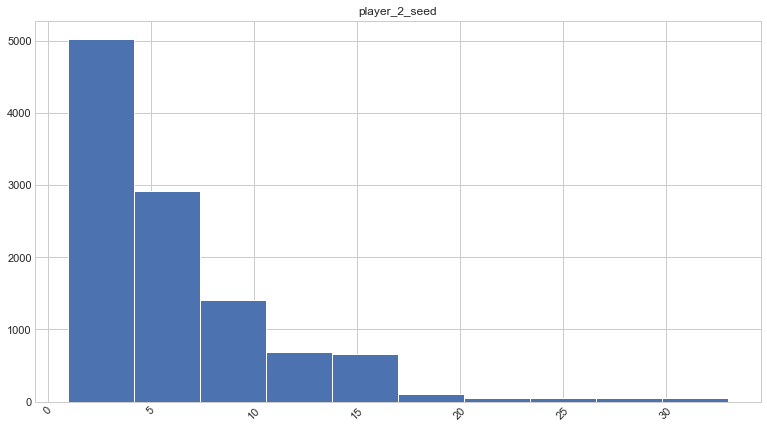

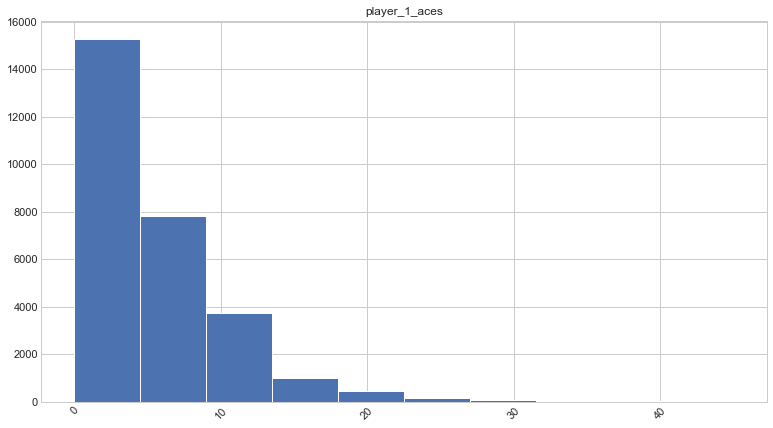

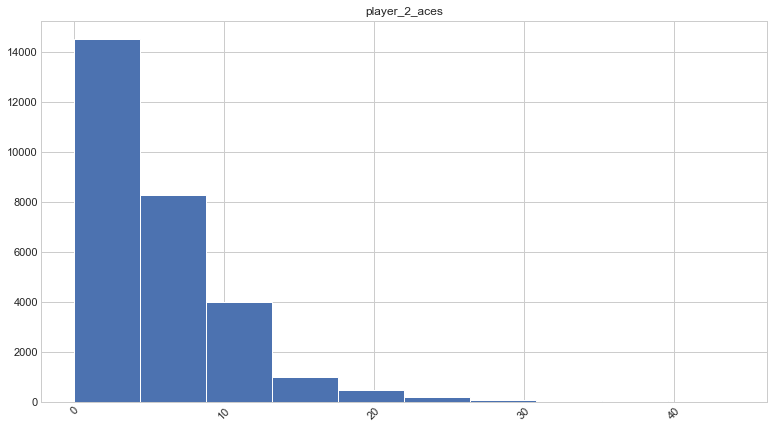

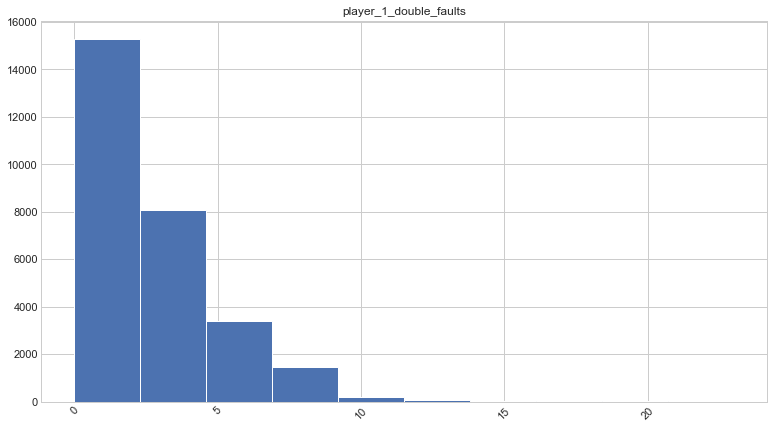

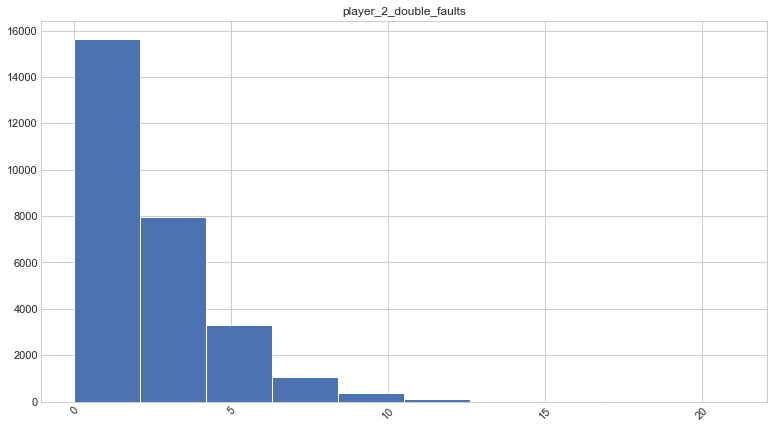

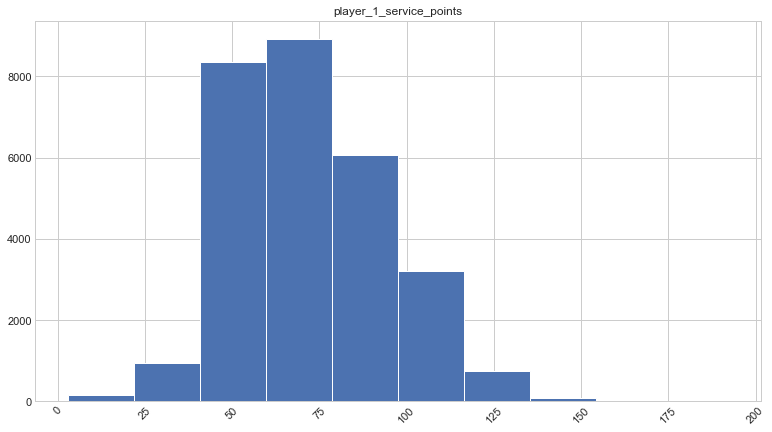

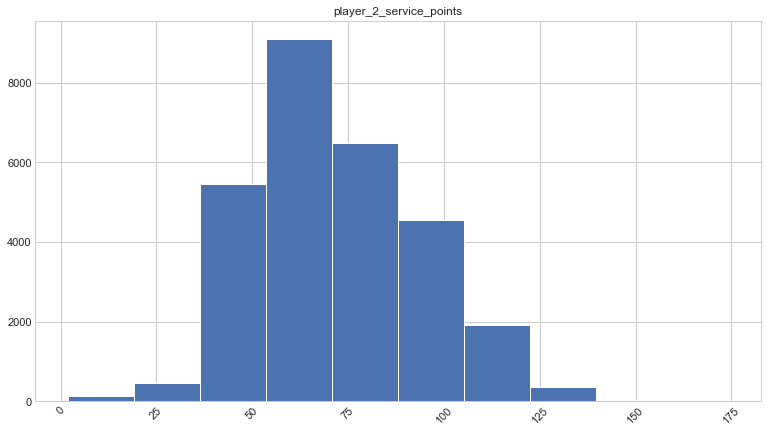

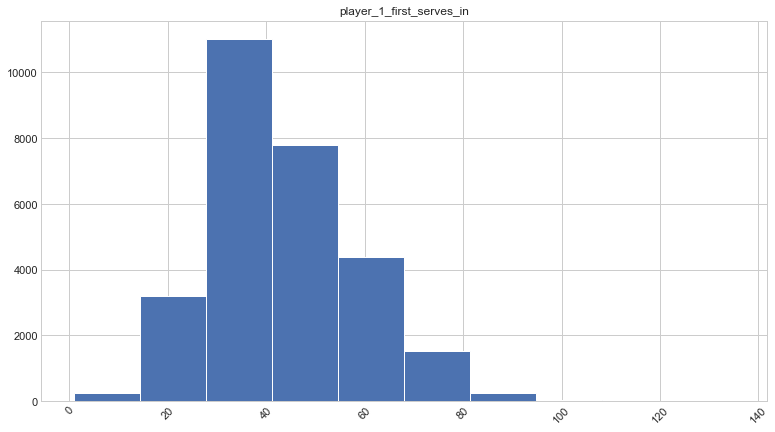

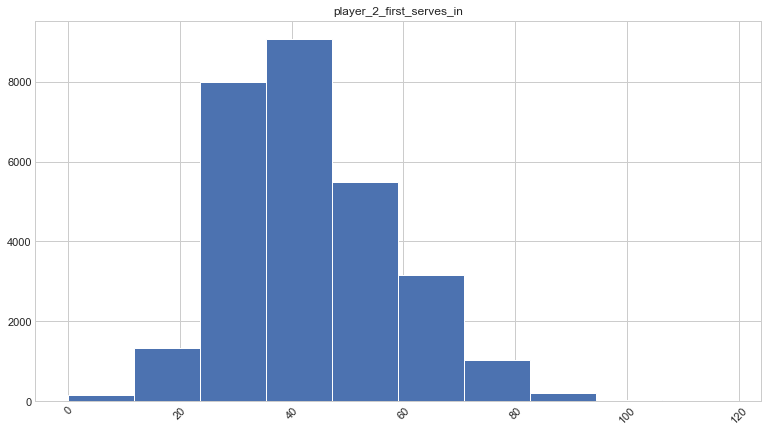

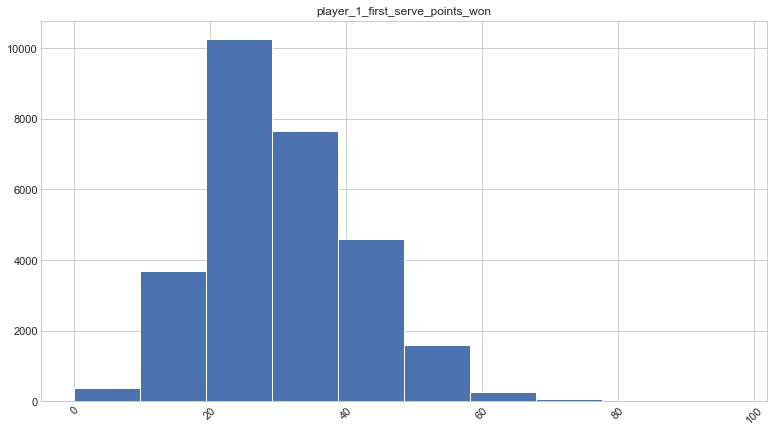

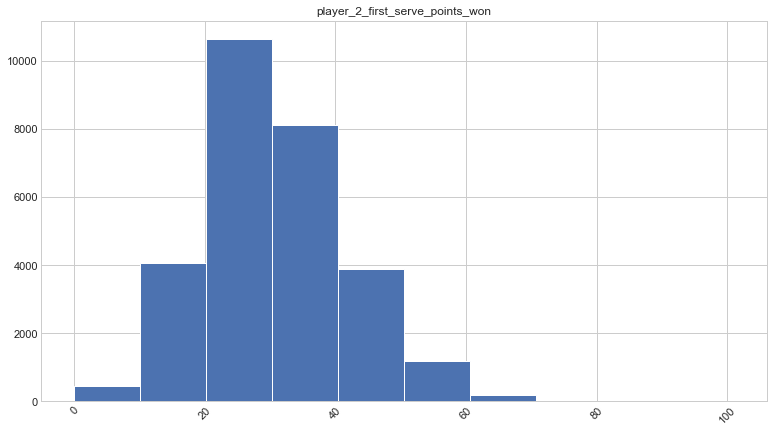

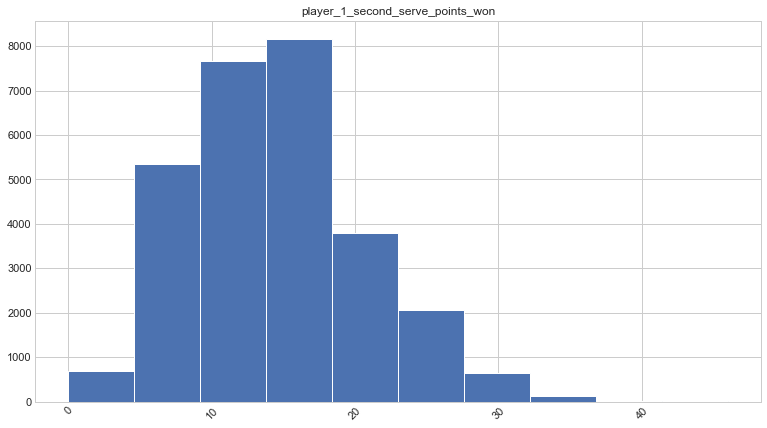

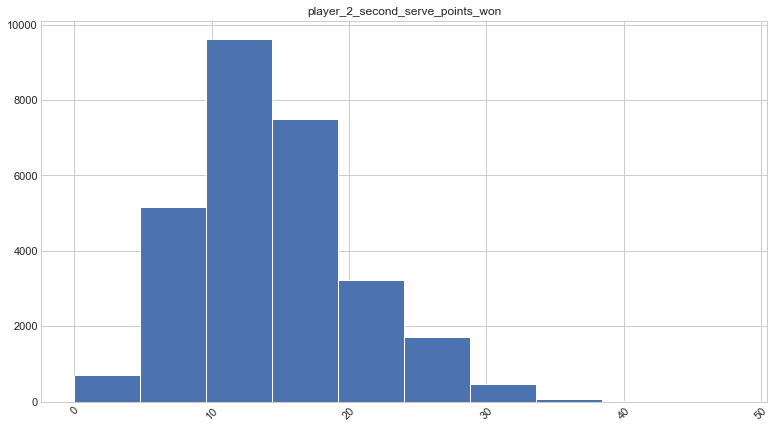

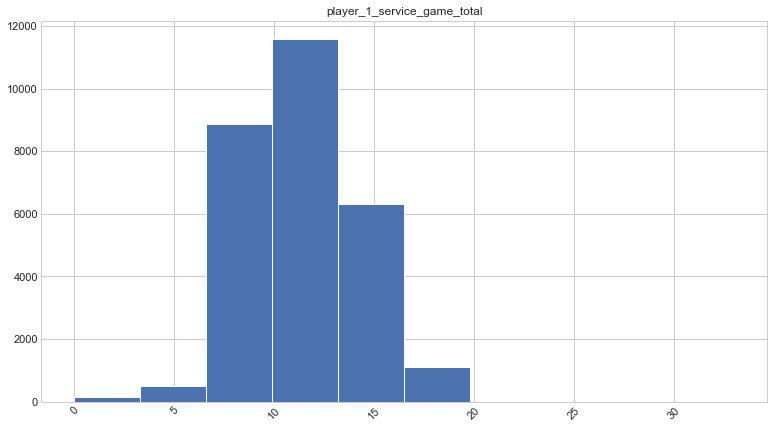

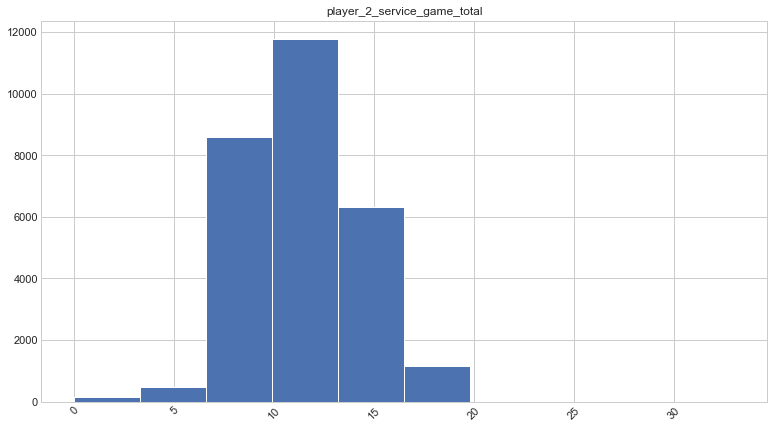

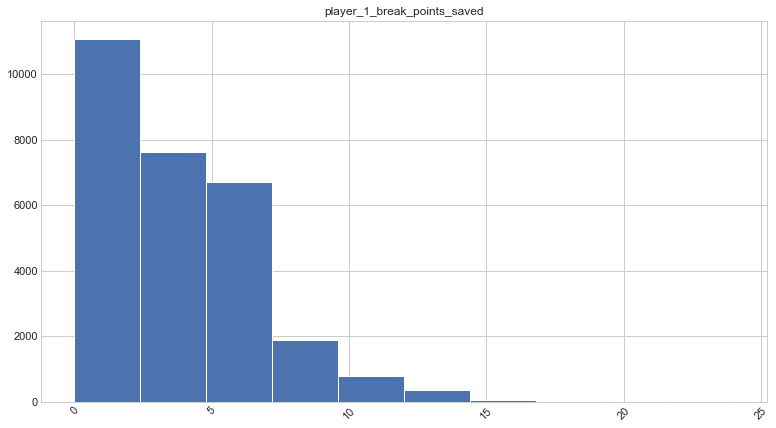

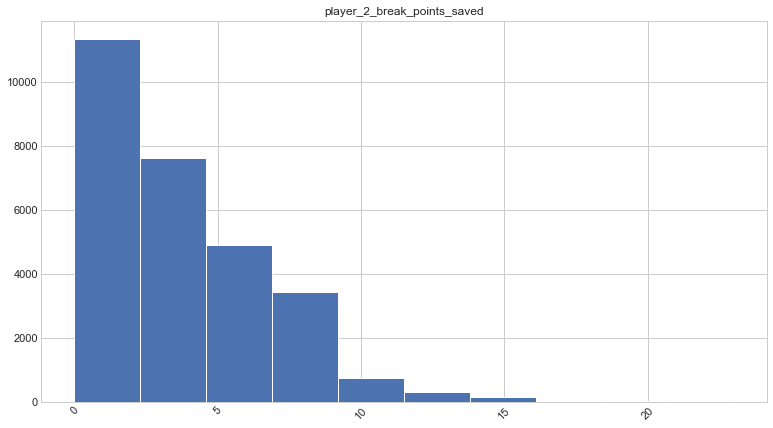

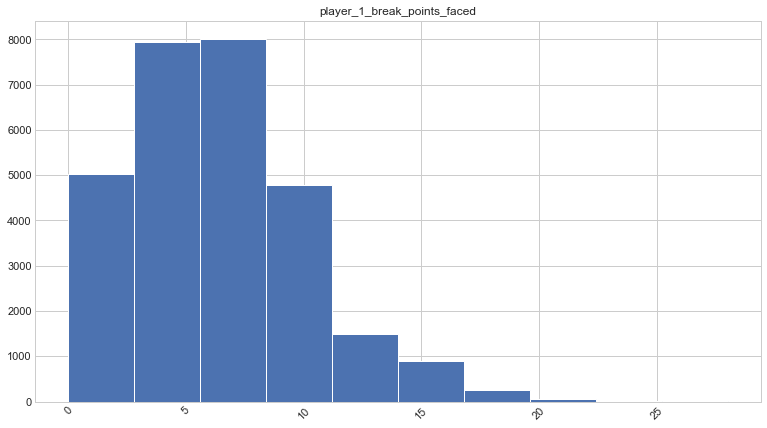

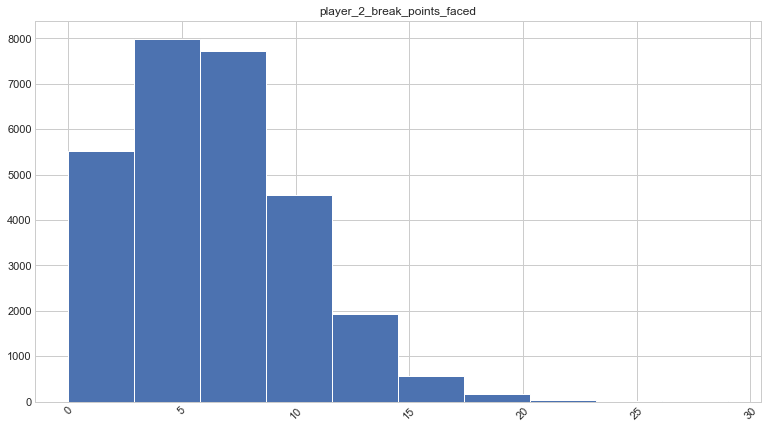

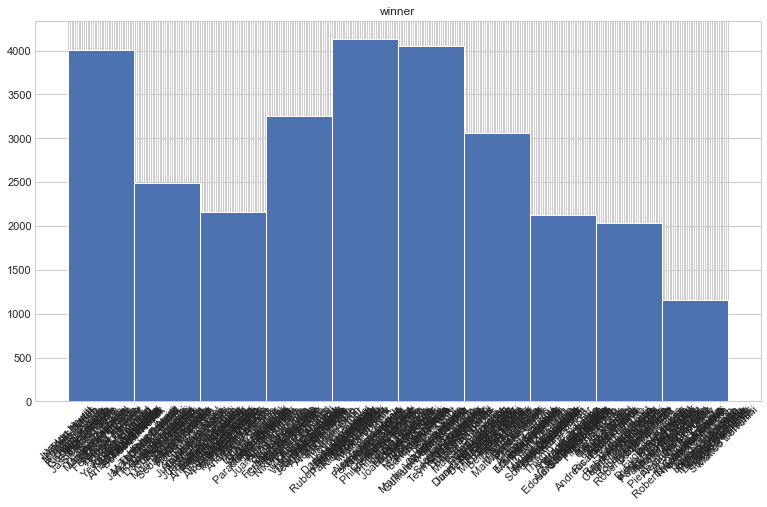

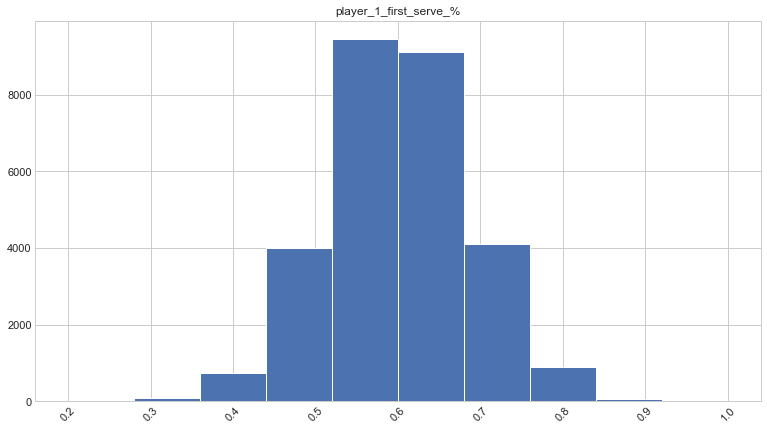

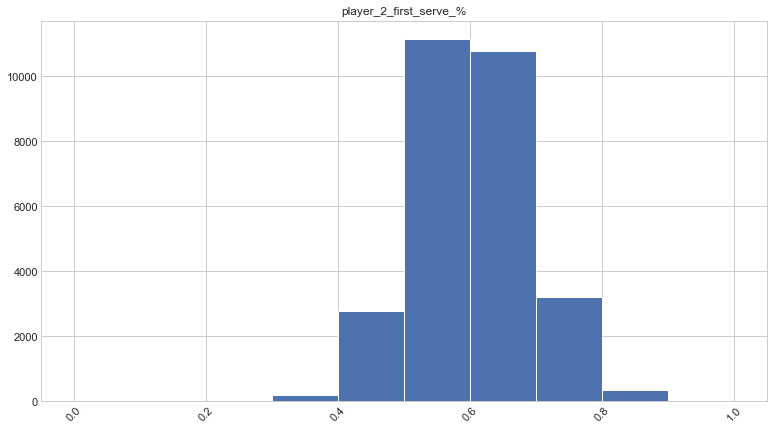

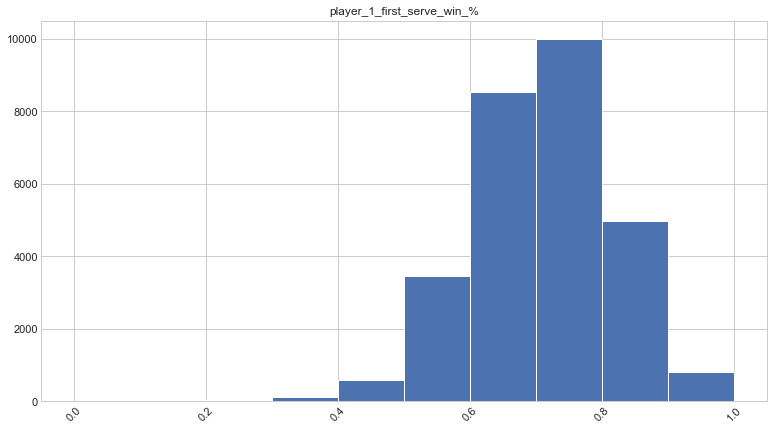

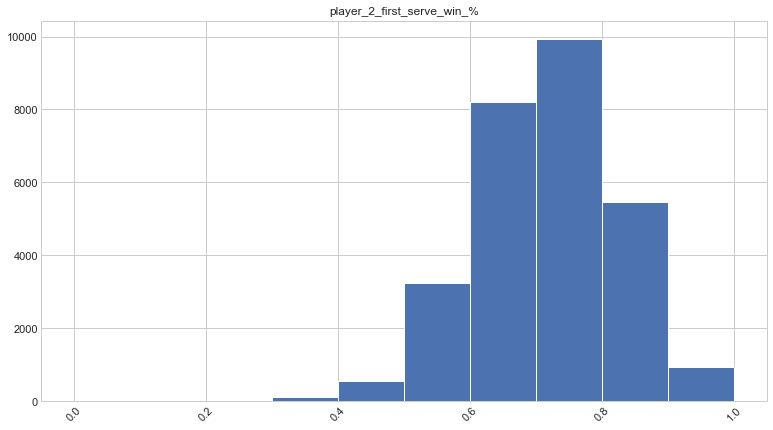

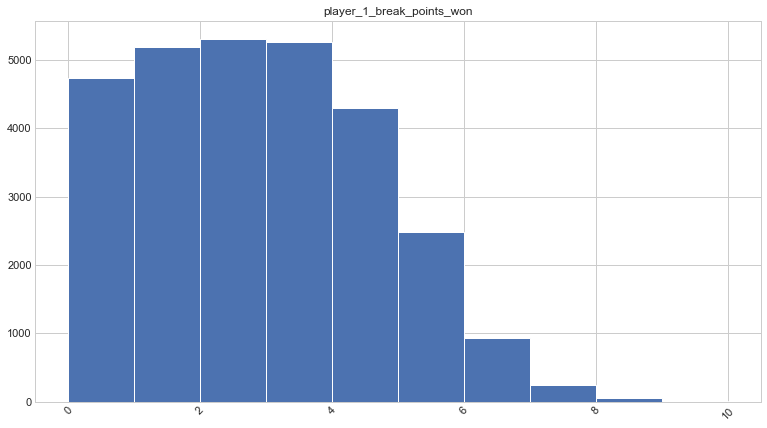

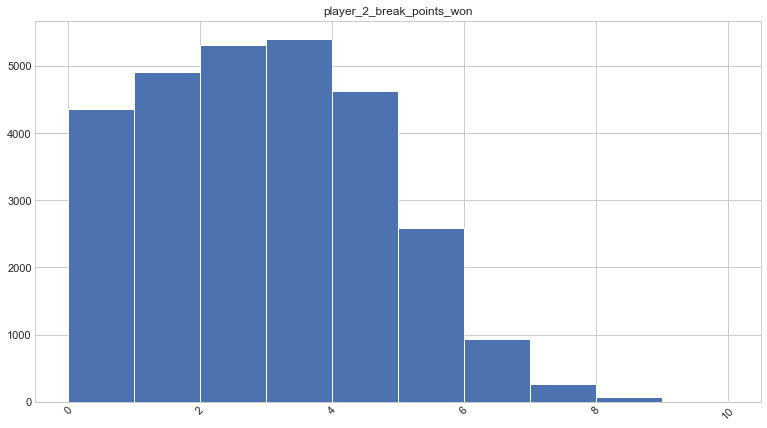

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

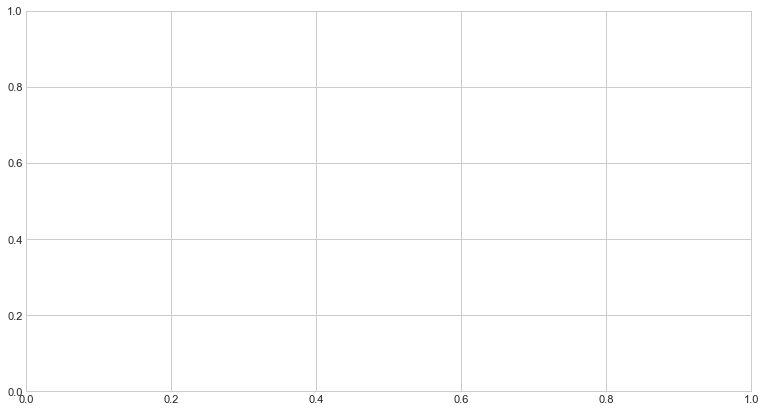

In [24]:
# visualize features for distribution 
for col in best_of_3:
    best_of_3[col].hist()
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

In [25]:
# create a list of colums with numeric values only
best_of_3.describe().columns


Index(['draw_size', 'match_num', 'best_of', 'minutes', 'player_1_age',
       'player_2_age', 'player_1_ht', 'player_2_ht', 'player_1_id',
       'player_2_id', 'player_1_rank', 'player_2_rank', 'player_1_rank_points',
       'player_2_rank_points', 'player_1_seed', 'player_2_seed',
       'player_1_aces', 'player_2_aces', 'player_1_double_faults',
       'player_2_double_faults', 'player_1_service_points',
       'player_2_service_points', 'player_1_first_serves_in',
       'player_2_first_serves_in', 'player_1_first_serve_points_won',
       'player_2_first_serve_points_won', 'player_1_second_serve_points_won',
       'player_2_second_serve_points_won', 'player_1_service_game_total',
       'player_2_service_game_total', 'player_1_break_points_saved',
       'player_2_break_points_saved', 'player_1_break_points_faced',
       'player_2_break_points_faced', 'player_1_first_serve_%',
       'player_2_first_serve_%', 'player_1_first_serve_win_%',
       'player_2_first_serve_win_%', 'pl

In [26]:
# create df with the numeric columsn of best_of_3
best_of_3_numeric = best_of_3[['draw_size', 'match_num', 'best_of', 'minutes', 'player_1_age',
       'player_2_age', 'player_1_ht', 'player_2_ht', 'player_1_id',
       'player_2_id', 'player_1_rank', 'player_2_rank', 'player_1_rank_points',
       'player_2_rank_points', 'player_1_seed', 'player_2_seed',
       'player_1_aces', 'player_2_aces', 'player_1_double_faults',
       'player_2_double_faults', 'player_1_service_points',
       'player_2_service_points', 'player_1_first_serves_in',
       'player_2_first_serves_in', 'player_1_first_serve_points_won',
       'player_2_first_serve_points_won', 'player_1_second_serve_points_won',
       'player_2_second_serve_points_won', 'player_1_service_game_total',
       'player_2_service_game_total', 'player_1_break_points_saved',
       'player_2_break_points_saved', 'player_1_break_points_faced',
       'player_2_break_points_faced', 'player_1_first_serve_%',
       'player_2_first_serve_%', 'player_1_first_serve_win_%',
       'player_2_first_serve_win_%', 'player_1_break_points_won',
       'player_2_break_points_won', 'surface_Clay', 'surface_Grass',
       'surface_Hard', 'tourney_level_D', 'tourney_level_F', 'tourney_level_G',
       'tourney_level_M', 'player_1_hand_R', 'player_2_hand_R', 'round_F',
       'round_QF', 'round_R128', 'round_R16', 'round_R32', 'round_R64',
       'round_RR', 'round_SF']].copy()

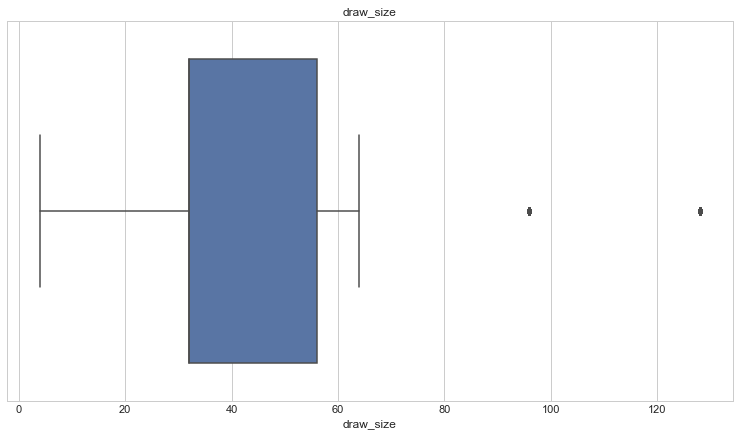

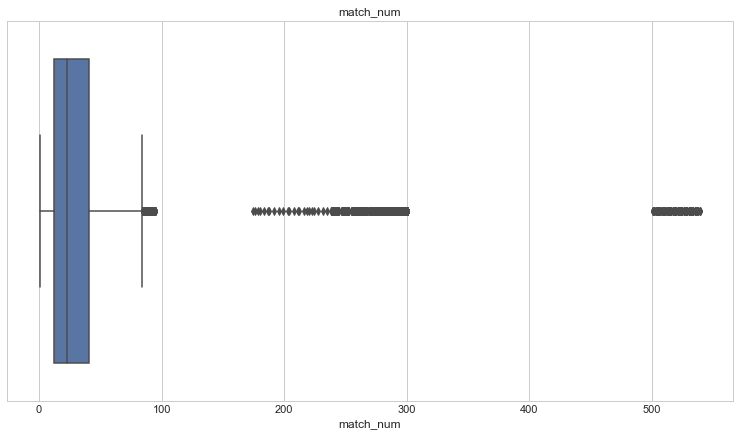

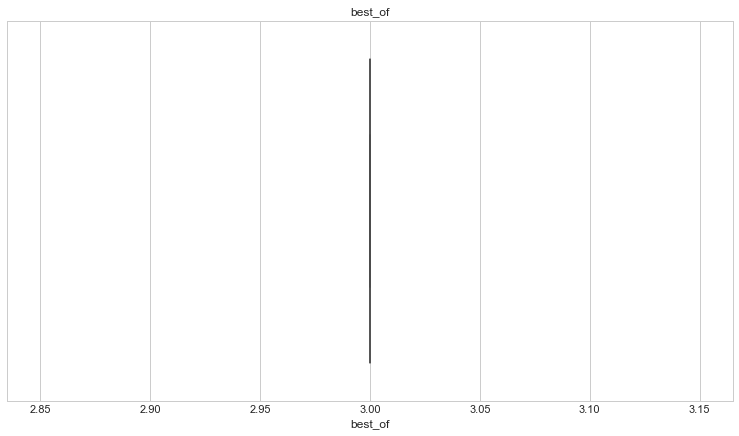

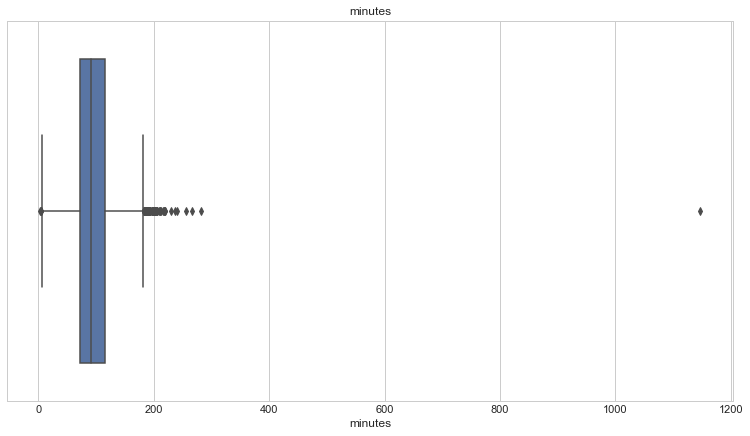

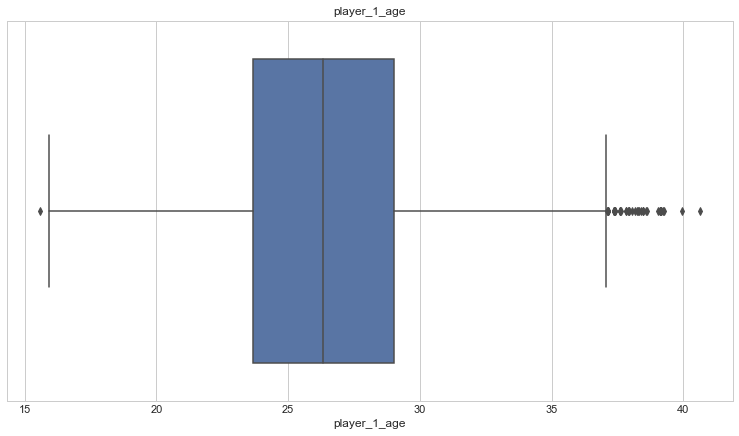

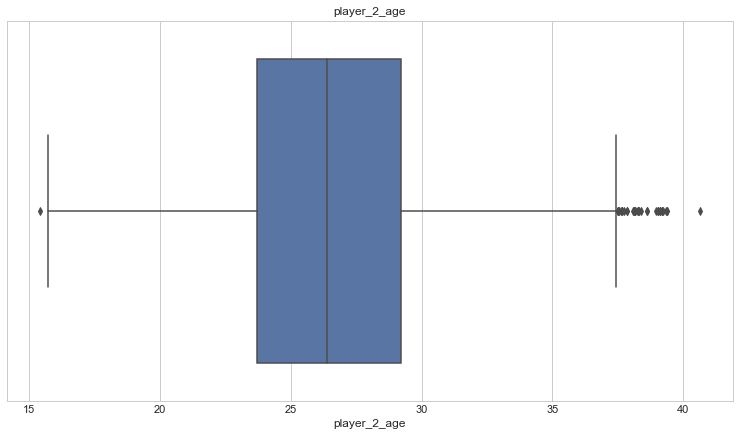

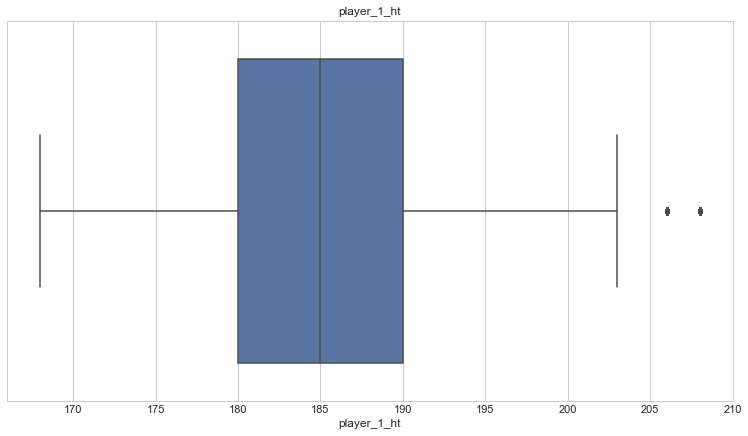

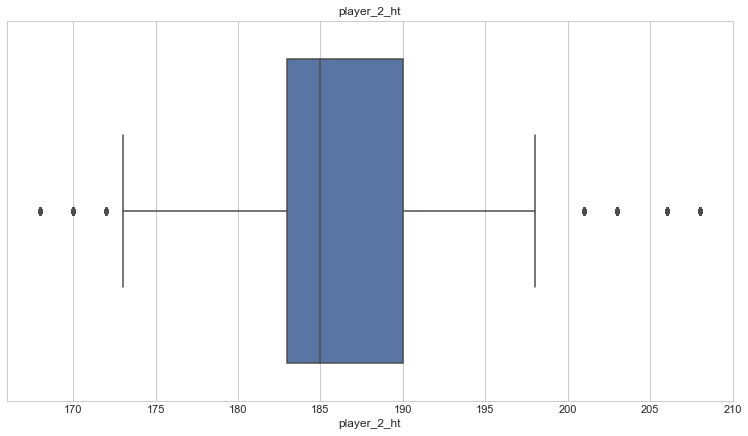

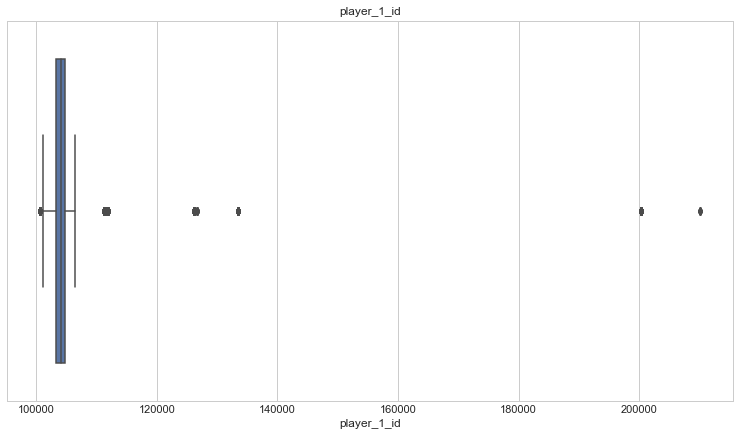

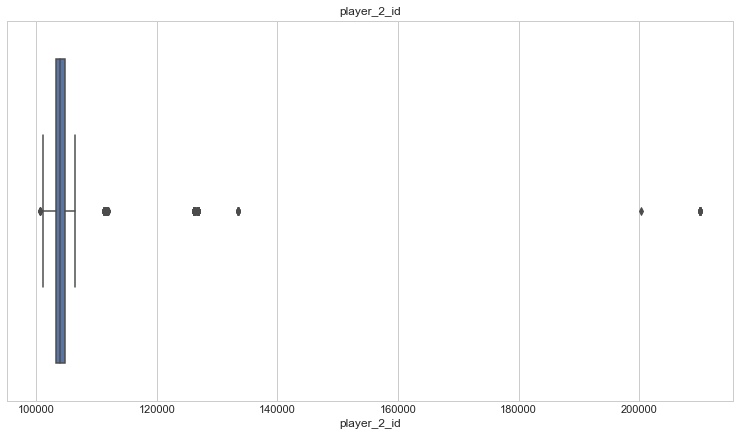

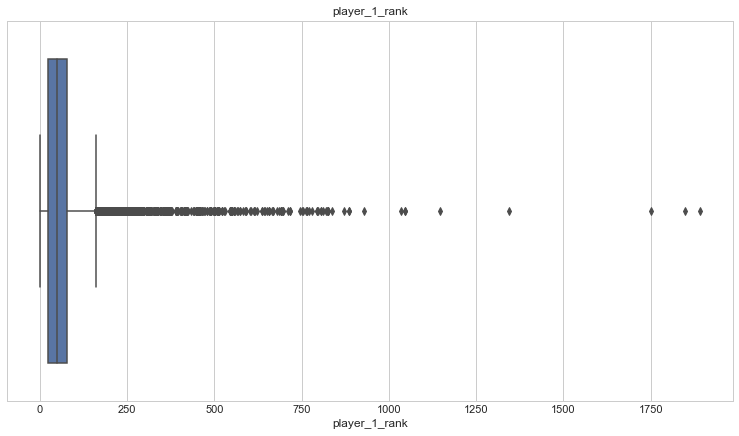

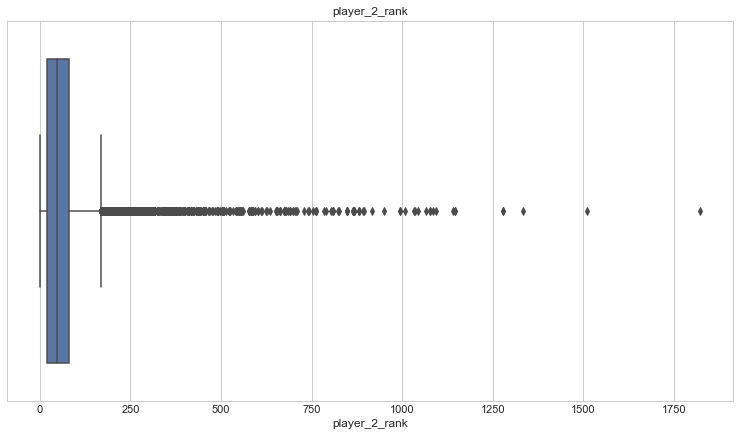

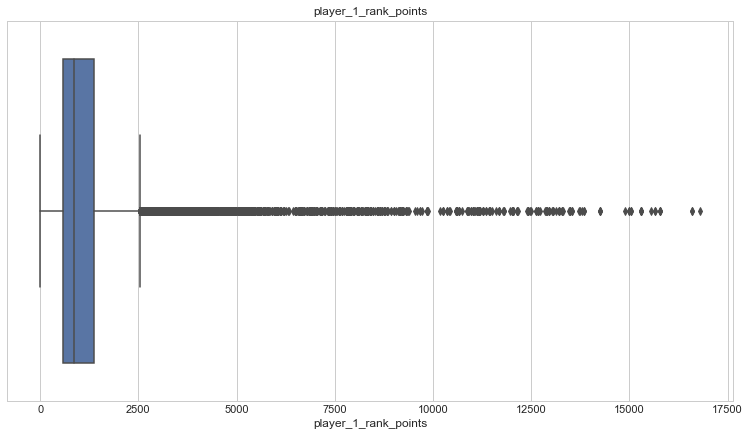

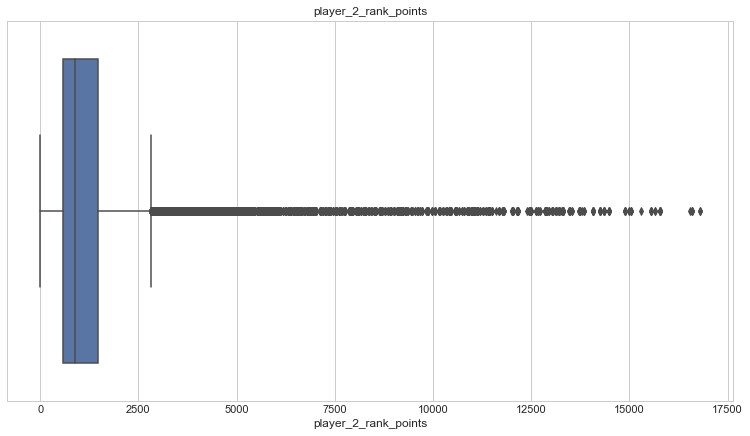

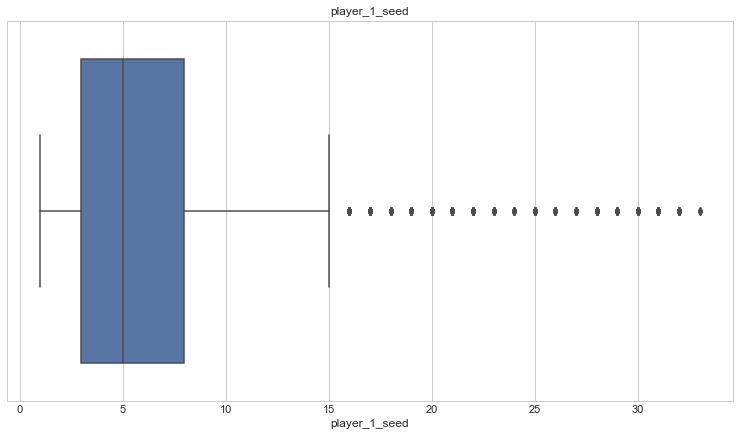

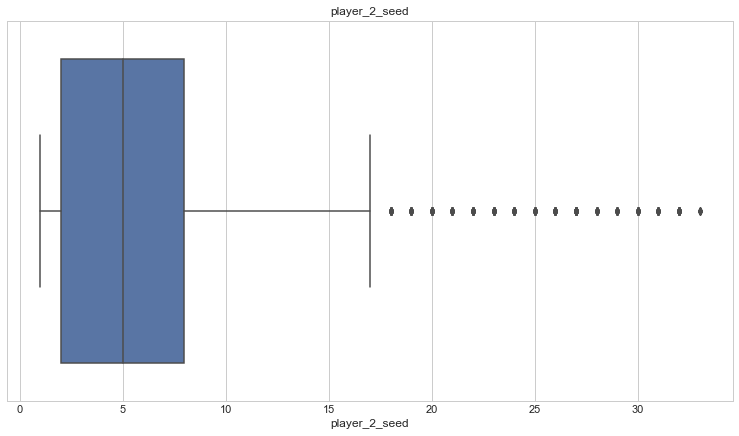

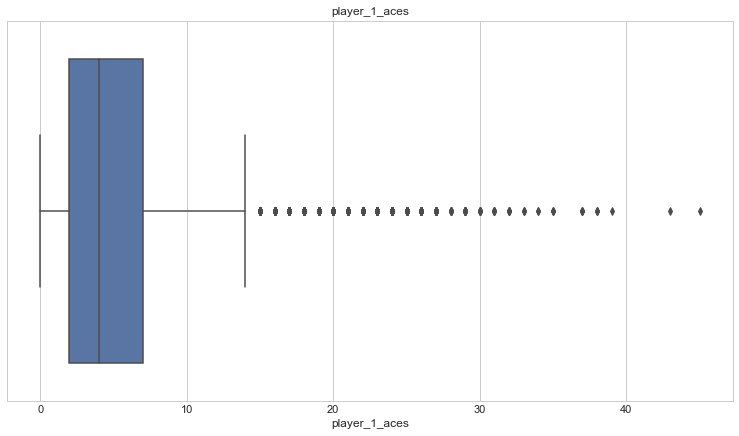

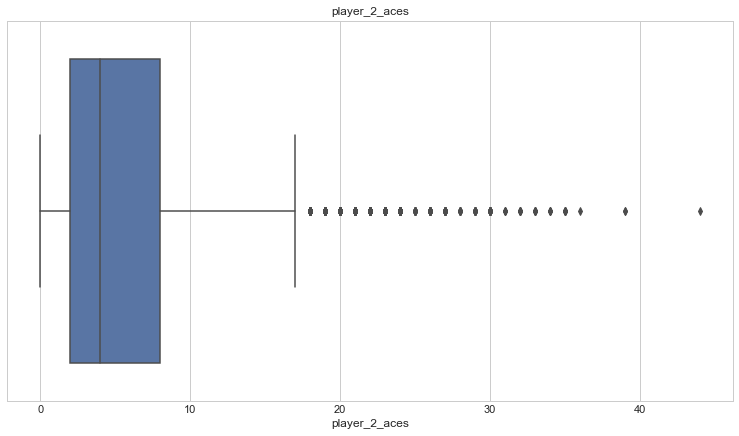

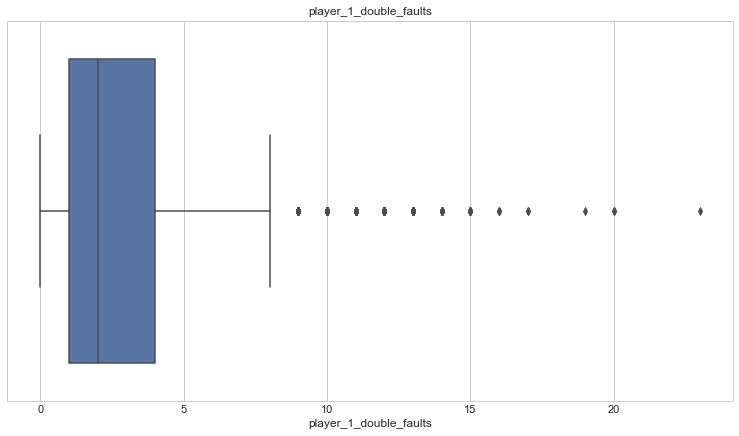

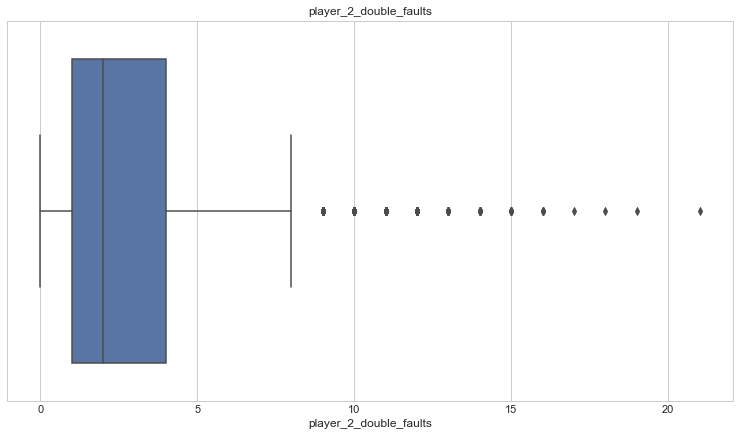

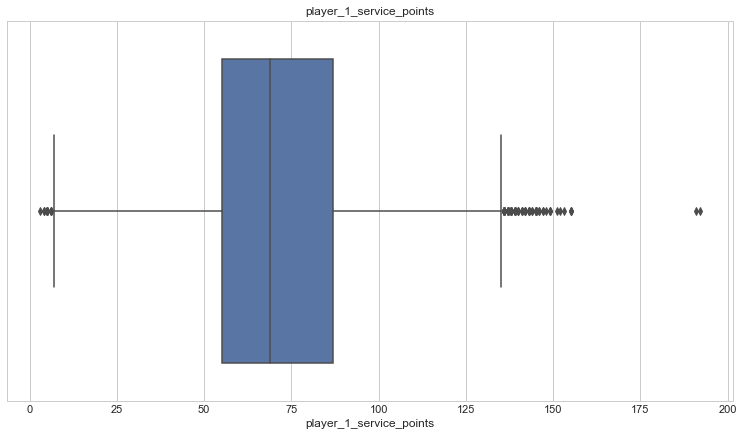

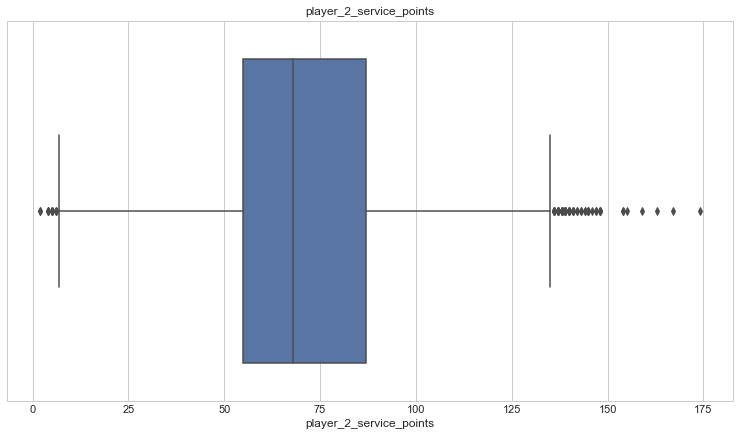

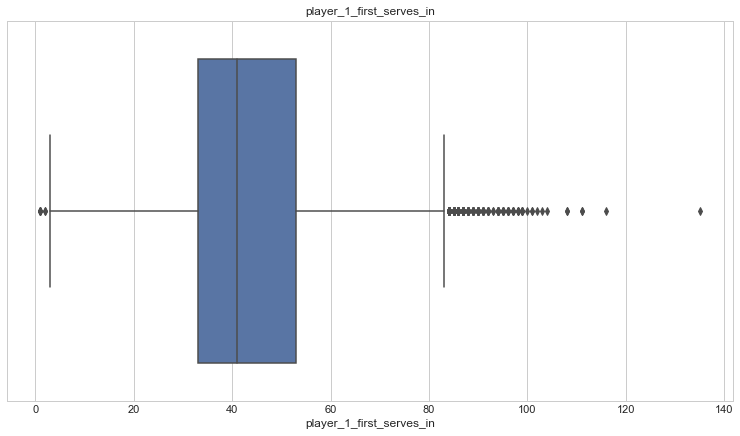

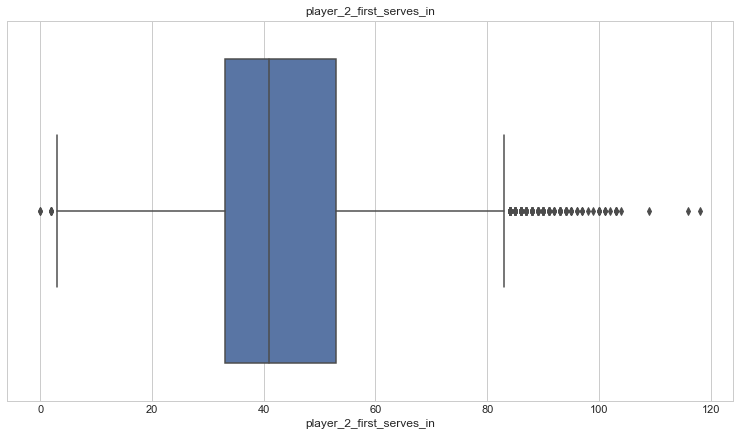

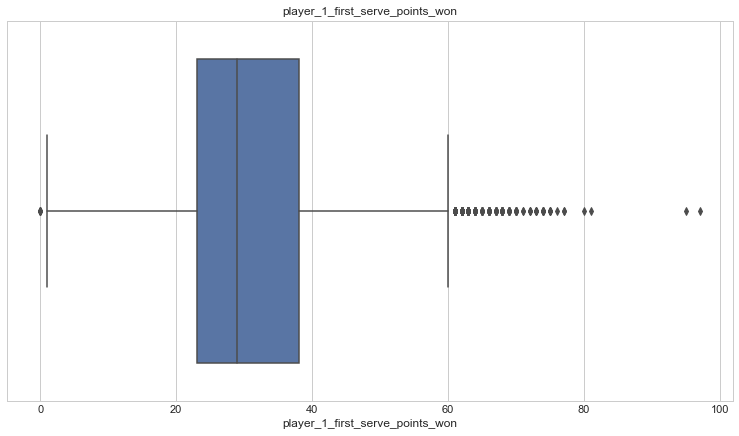

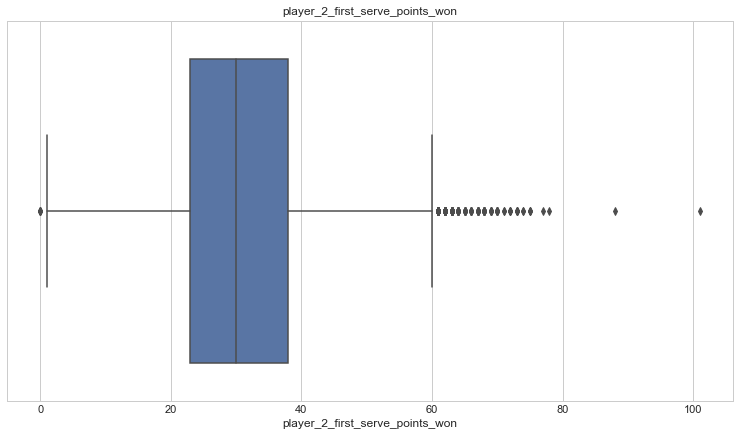

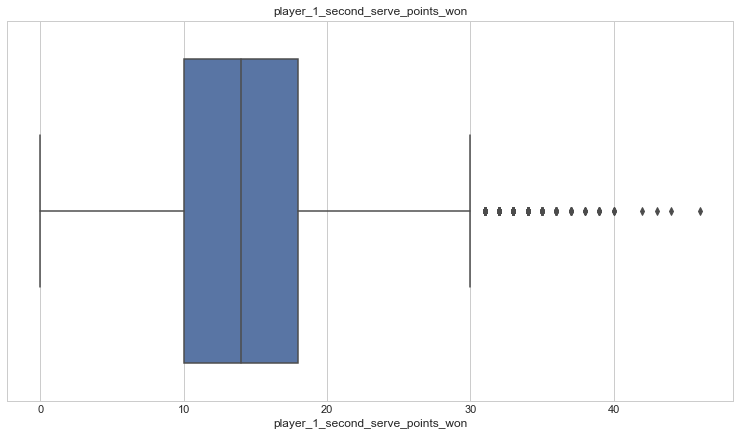

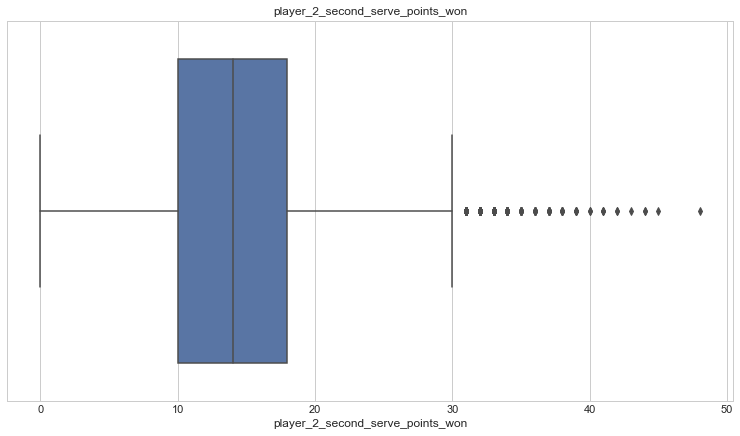

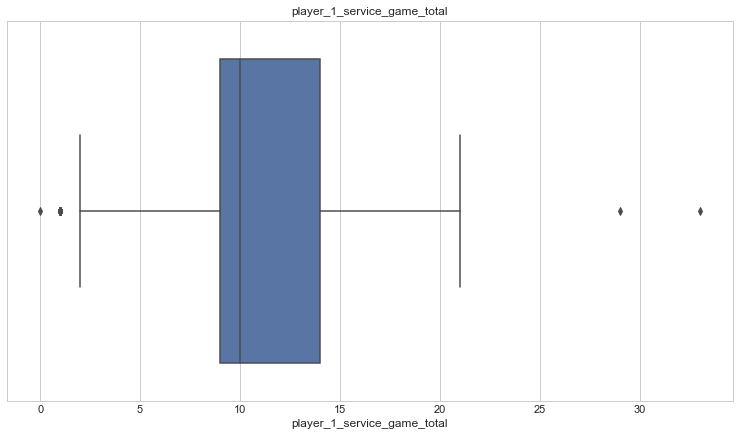

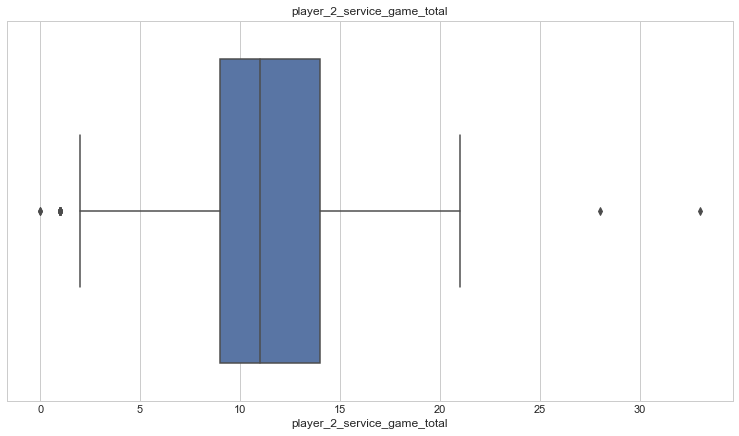

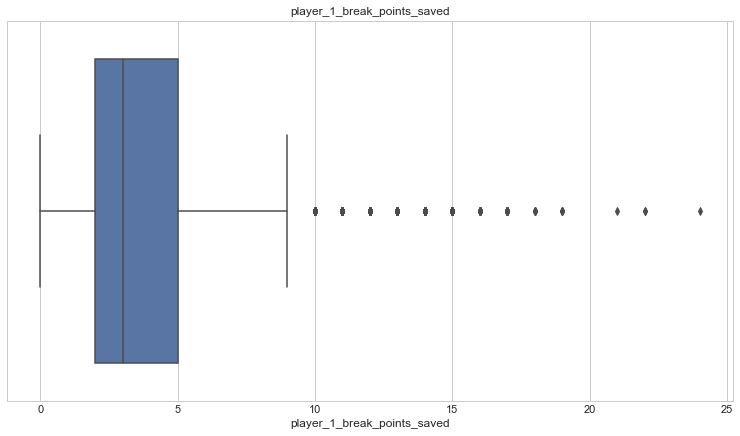

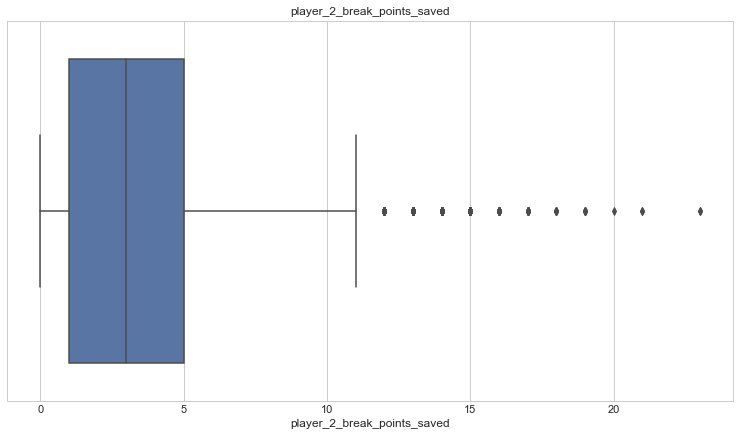

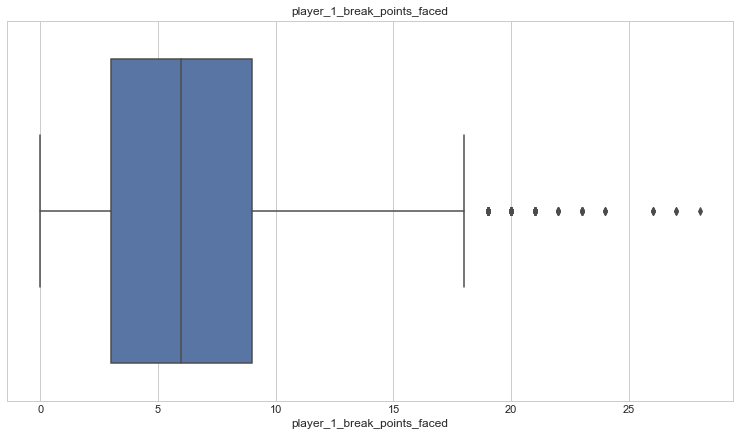

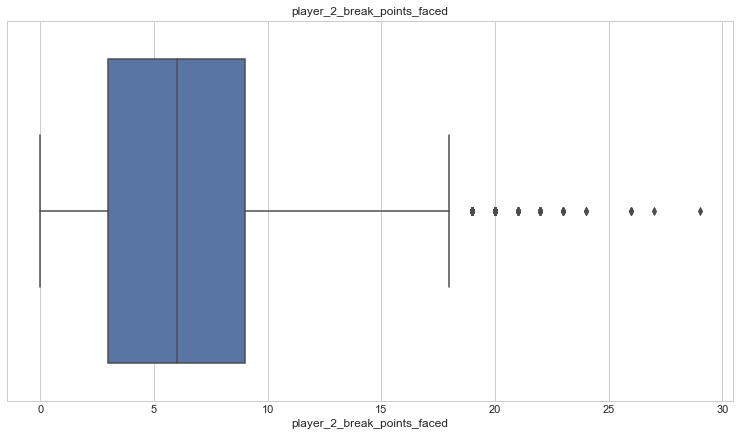

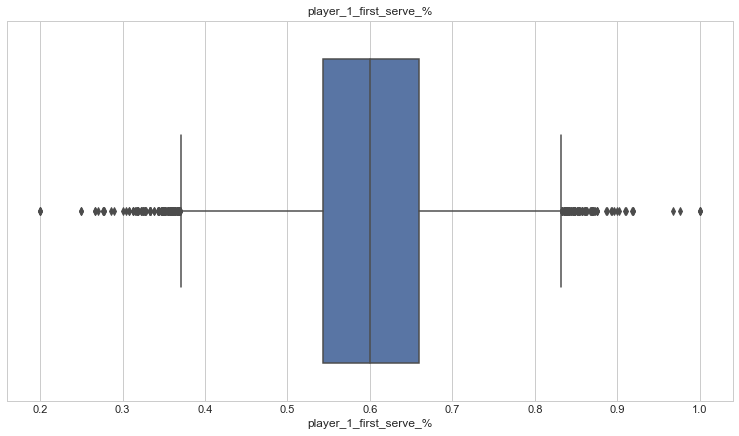

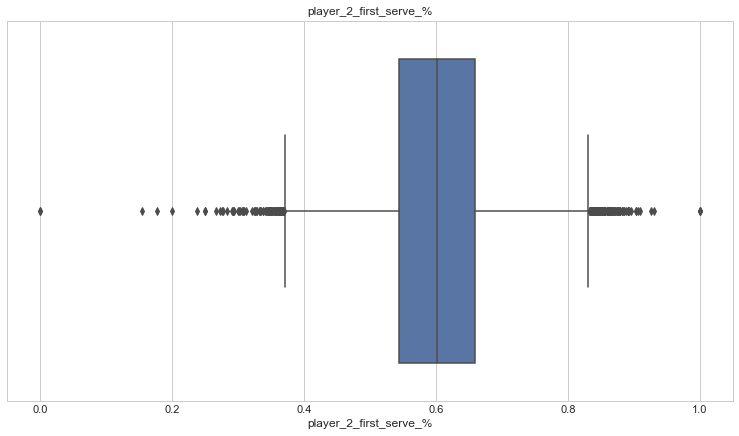

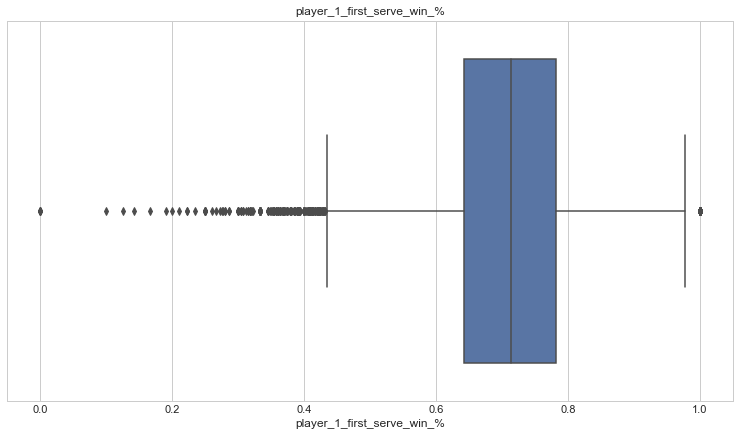

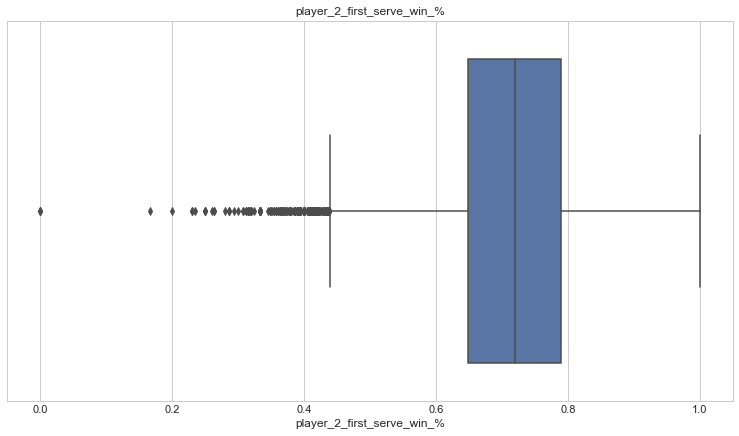

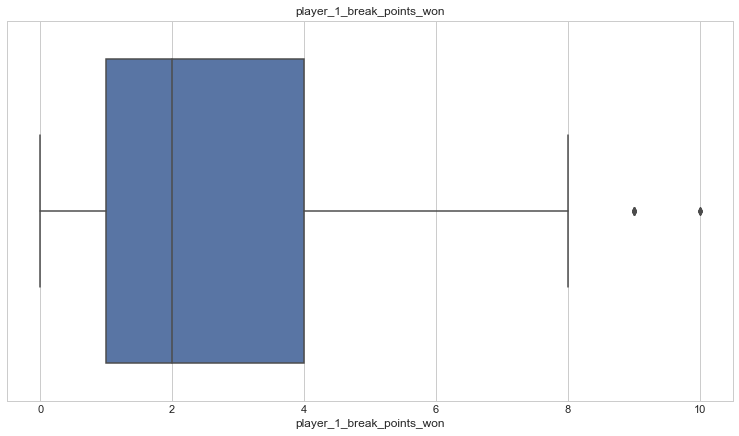

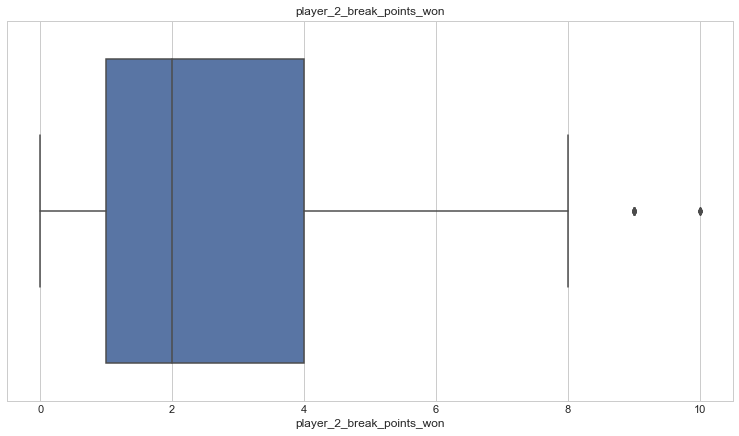

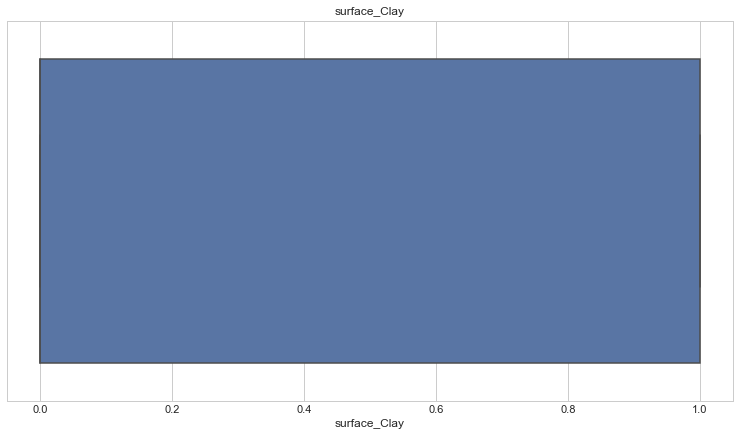

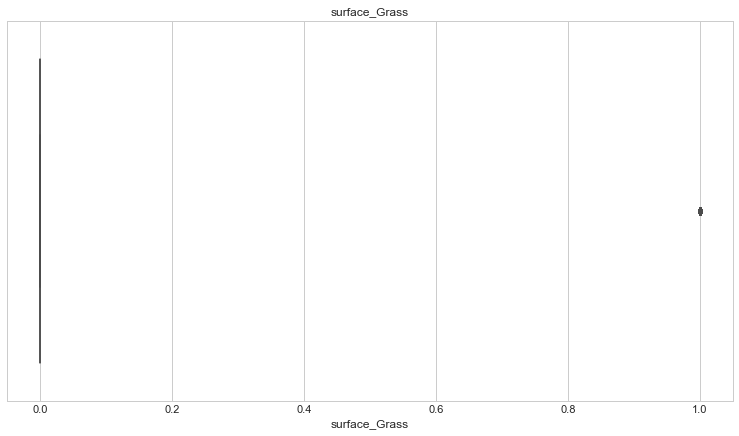

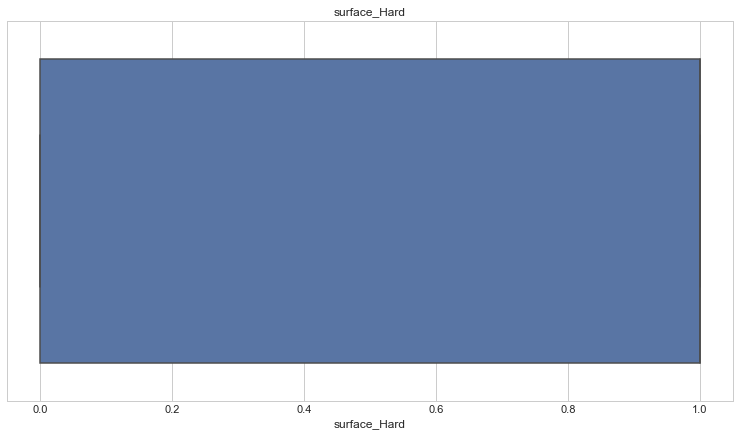

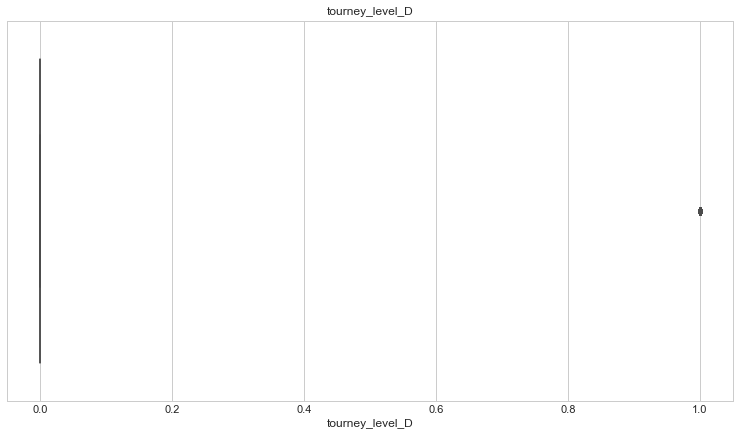

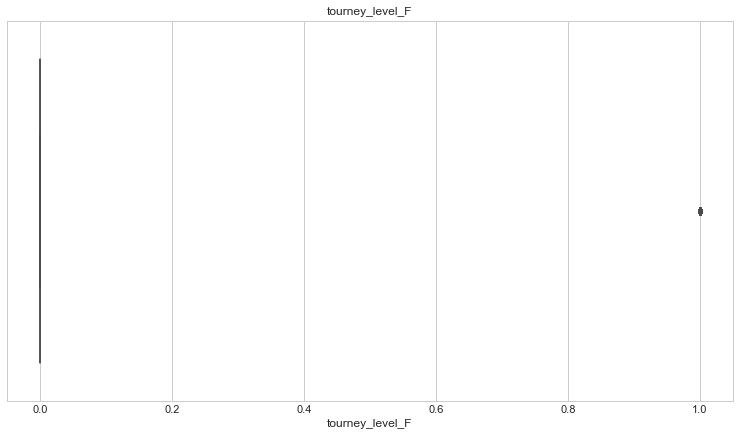

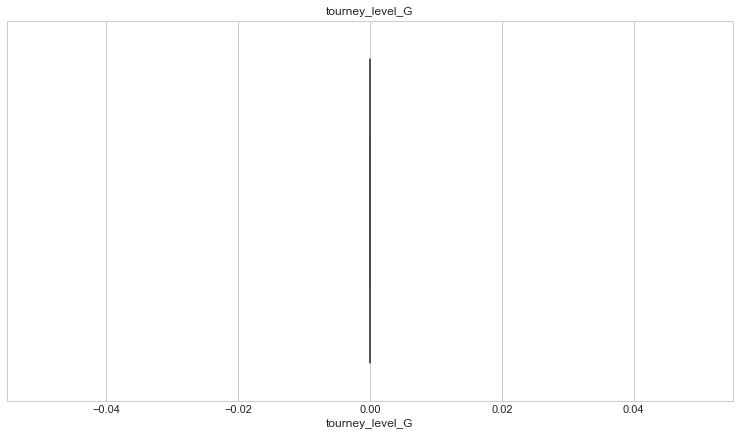

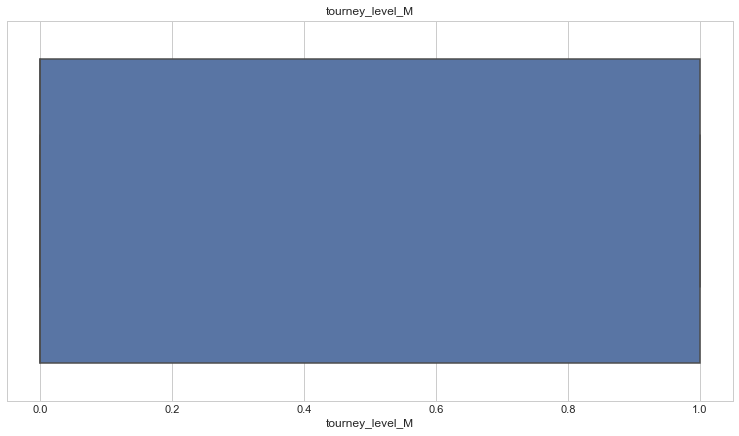

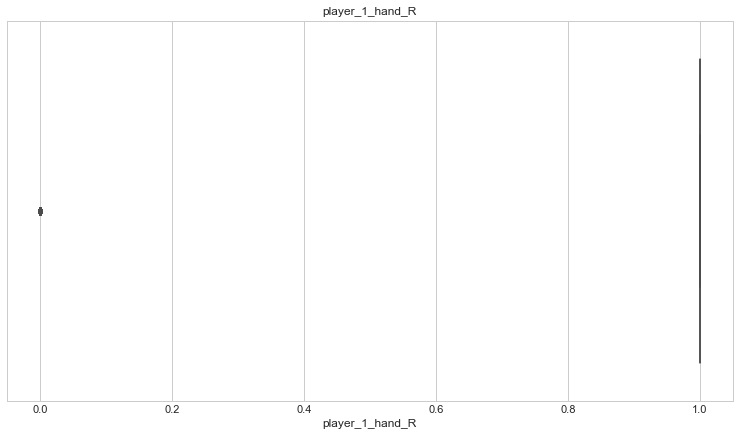

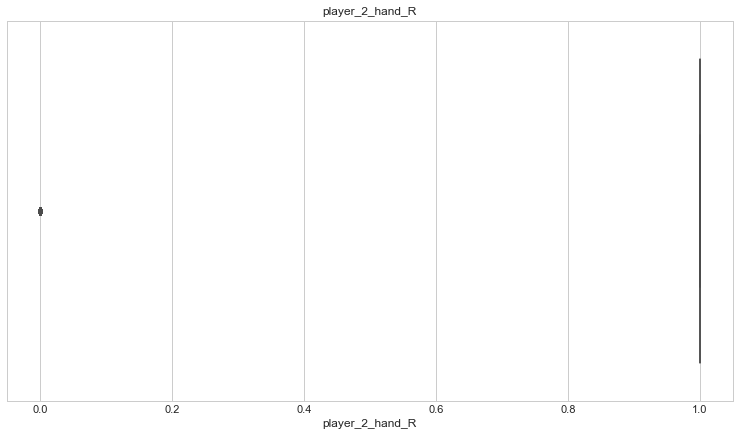

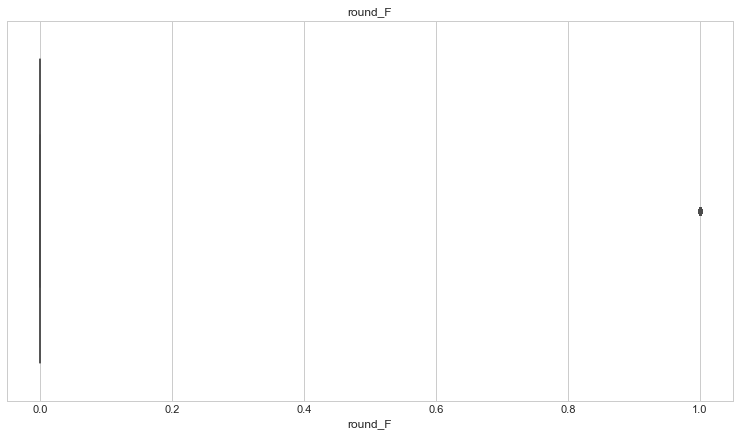

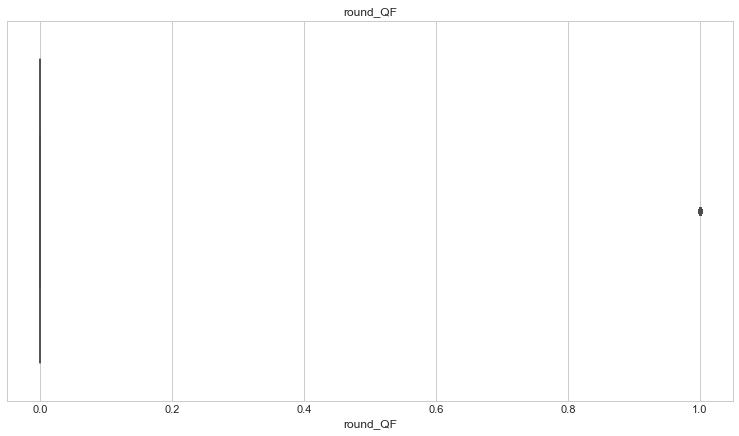

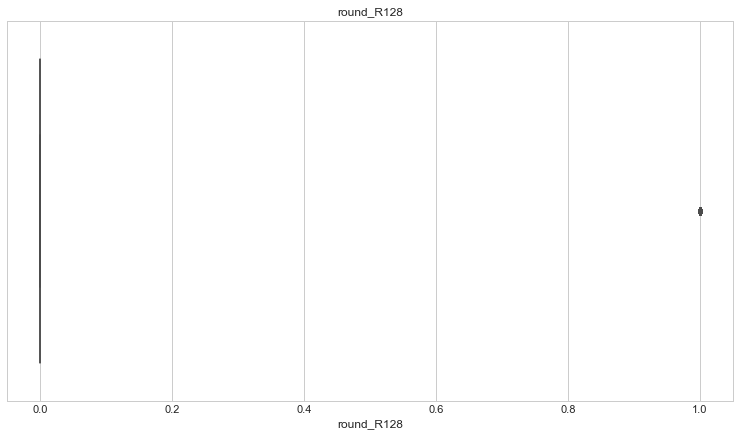

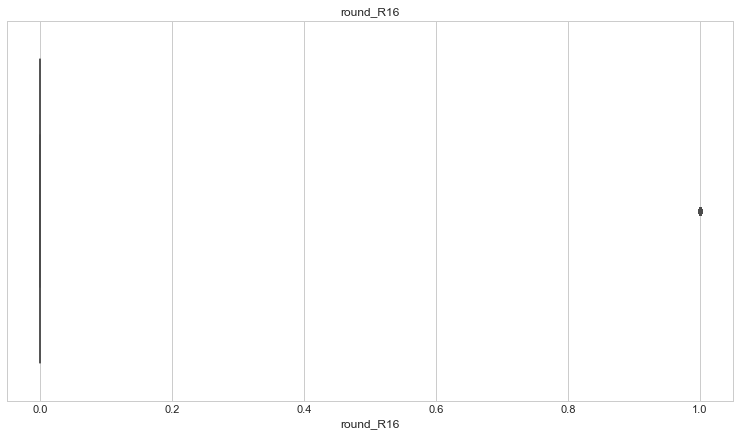

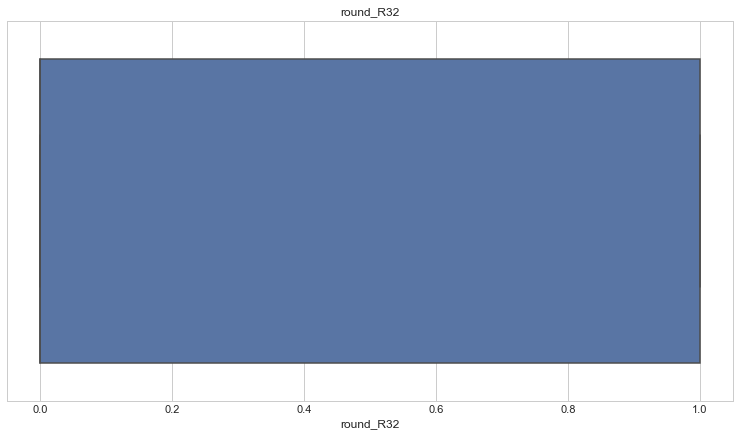

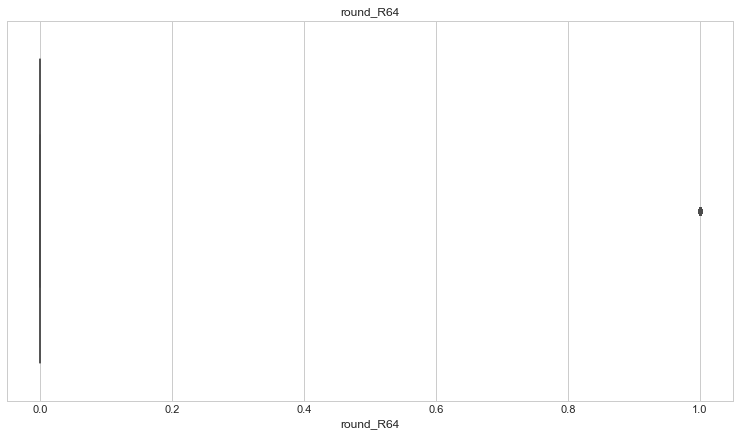

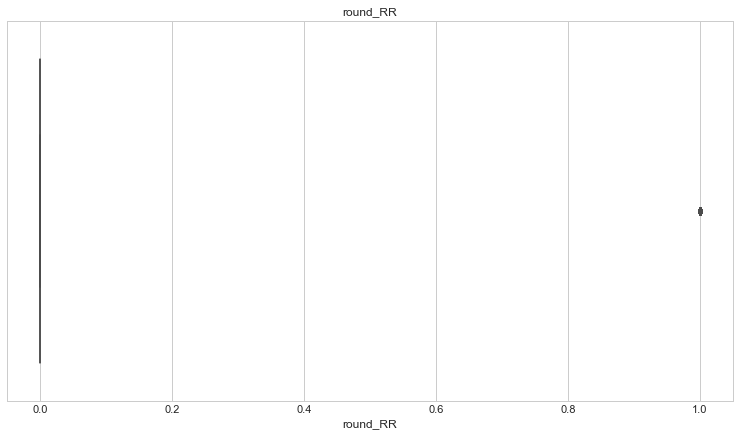

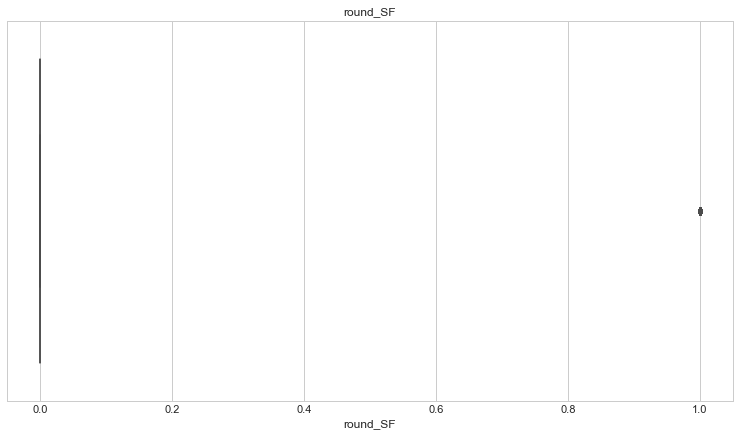

In [27]:
# visualize features for outliers
for col in best_of_3_numeric:
    sns.boxplot(best_of_3_numeric[col])
    plt.title(col)
    plt.show()

In [30]:
print(f'best of 3 shape = {best_of_3.shape[0]}')
print(f'best of 5 shape = {best_of_5.shape[0]}')
print(f'Total rows = {best_of_3.shape[0] + best_of_5.shape[0]}')


best of 3 shape = 28485
best of 5 shape = 7484
Total rows = 35969


## Takeaway 
- Splitting the data between best of 5 and best of 3 does no eliminate the outliers as we expected 

In [32]:
match.sample()


,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,player_1,player_2,player_1_age,player_2_age,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,player_1_aces,player_2_aces,player_1_double_faults,player_2_double_faults,player_1_service_points,player_2_service_points,player_1_first_serves_in,player_2_first_serves_in,player_1_first_serve_points_won,player_2_first_serve_points_won,player_1_second_serve_points_won,player_2_second_serve_points_won,player_1_service_game_total,player_2_service_game_total,player_1_break_points_saved,player_2_break_points_saved,player_1_break_points_faced,player_2_break_points_faced,winner,player_1_first_serve_%,player_2_first_serve_%,player_1_first_serve_win_%,player_2_first_serve_win_%,player_1_break_points_won,player_2_break_points_won,player_1_wins,surface_Clay,surface_Grass,surface_Hard,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,player_1_hand_R,player_2_hand_R,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-07-19,2009-419,Indianapolis,Hard,32,A,17,6-3 6-3,3,R16,69.0,Dmitry Tursunov,Marcos Daniel,26.603696,31.04449,NaN,NaN,R,R,185.0,180.0,104098,103228,RUS,BRA,Dmitry Tursunov,Marcos Daniel,27.0,75.0,1560.0,790.0,1.0,NaN,9.0,7.0,1.0,4.0,48.0,64.0,30.0,33.0,23.0,19.0,11.0,15.0,9.0,9.0,1.0,2.0,2.0,6.0,Dmitry Tursunov,0.625,0.515625,0.766667,0.575758,4.0,1.0,True,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0


In [39]:
# lets create a dataframe that allows us to analyse Roger Federer and his games 
roger1 = match[match['player_1'] == 'Roger Federer']
roger2 = match[match['player_2'] == 'Roger Federer']
roger = pd.concat([roger1, roger2])

In [41]:
roger.sample(5)

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,player_1,player_2,player_1_age,player_2_age,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,player_1_aces,player_2_aces,player_1_double_faults,player_2_double_faults,player_1_service_points,player_2_service_points,player_1_first_serves_in,player_2_first_serves_in,player_1_first_serve_points_won,player_2_first_serve_points_won,player_1_second_serve_points_won,player_2_second_serve_points_won,player_1_service_game_total,player_2_service_game_total,player_1_break_points_saved,player_2_break_points_saved,player_1_break_points_faced,player_2_break_points_faced,winner,player_1_first_serve_%,player_2_first_serve_%,player_1_first_serve_win_%,player_2_first_serve_win_%,player_1_break_points_won,player_2_break_points_won,player_1_wins,surface_Clay,surface_Grass,surface_Hard,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,player_1_hand_R,player_2_hand_R,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-17,2011-580,Australian Open,Hard,128,G,124,6-1 6-3 6-3,5,QF,107.0,Roger Federer,Stan Wawrinka,29.442847,25.806982,NaN,NaN,R,R,185.0,183.0,103819,104527,SUI,SUI,Roger Federer,Stan Wawrinka,2.0,19.0,9245.0,1855.0,2.0,19.0,5.0,1.0,0.0,0.0,75.0,81.0,58.0,47.0,42.0,27.0,13.0,19.0,13.0,12.0,1.0,2.0,1.0,6.0,Roger Federer,0.773333,0.580247,0.724138,0.574468,4.0,0.0,True,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0
2006-05-29,2006-520,Roland Garros,Clay,128,G,65,6-1 6-4 6-3,5,R64,86.0,Alejandro Falla,Roger Federer,22.537988,24.804928,LL,NaN,L,R,185.0,185.0,104268,103819,COL,SUI,Alejandro Falla,Roger Federer,139.0,1.0,309.0,7010.0,NaN,1.0,4.0,4.0,1.0,0.0,86.0,68.0,57.0,46.0,33.0,40.0,14.0,15.0,13.0,13.0,6.0,3.0,11.0,3.0,Roger Federer,0.662791,0.676471,0.578947,0.869565,0.0,5.0,False,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
2017-10-09,2017-5014,Shanghai Masters,Hard,64,M,286,6-4 6-2,3,R16,60.0,Alexandr Dolgopolov,Roger Federer,28.919918,36.169747,Q,NaN,R,R,180.0,185.0,105238,103819,UKR,SUI,Alexandr Dolgopolov,Roger Federer,41.0,2.0,1116.0,7505.0,NaN,2.0,6.0,11.0,1.0,1.0,68.0,46.0,42.0,37.0,27.0,29.0,12.0,8.0,9.0,9.0,4.0,1.0,7.0,1.0,Roger Federer,0.617647,0.804348,0.642857,0.783784,0.0,3.0,False,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0
2015-08-16,2015-422,Cincinnati Masters,Hard,56,M,40,6-4 6-4,3,R32,NaN,Roberto Bautista Agut,Roger Federer,27.340178,34.023272,NaN,NaN,R,R,183.0,185.0,105138,103819,ESP,SUI,Roberto Bautista Agut,Roger Federer,22.0,3.0,1555.0,8065.0,NaN,2.0,4.0,6.0,0.0,2.0,72.0,49.0,50.0,21.0,30.0,20.0,13.0,20.0,10.0,10.0,8.0,0.0,10.0,0.0,Roger Federer,0.694444,0.428571,0.600000,0.952381,0.0,2.0,False,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0
2009-03-25,2009-403,Miami Masters,Hard,96,M,80,6-4 6-1,3,R32,71.0,Nicolas Kiefer,Roger Federer,31.715264,27.622177,NaN,NaN,R,R,183.0,185.0,103017,103819,GER,SUI,Nicolas Kiefer,Roger Federer,29.0,2.0,1755.0,10910.0,28.0,2.0,5.0,5.0,3.0,1.0,59.0,44.0,32.0,35.0,24.0,26.0,7.0,6.0,9.0,8.0,2.0,0.0,6.0,0.0,Roger Federer,0.542373,0.795455,0.750000,0.742857,0.0,4.0,False,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0


In [45]:
# lets take a look at Rafael Nadal vs Roger Federer by creating a new df 
n_vs_r1 = roger[roger['player_1'] == 'Rafael Nadal']
n_vs_r2 = roger[roger['player_2'] == 'Rafael Nadal']
n_vs_r  = pd.concat([n_vs_r1, n_vs_r2])
n_vs_r.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,player_1,player_2,player_1_age,player_2_age,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,player_1_aces,player_2_aces,player_1_double_faults,player_2_double_faults,player_1_service_points,player_2_service_points,player_1_first_serves_in,player_2_first_serves_in,player_1_first_serve_points_won,player_2_first_serve_points_won,player_1_second_serve_points_won,player_2_second_serve_points_won,player_1_service_game_total,player_2_service_game_total,player_1_break_points_saved,player_2_break_points_saved,player_1_break_points_faced,player_2_break_points_faced,winner,player_1_first_serve_%,player_2_first_serve_%,player_1_first_serve_win_%,player_2_first_serve_win_%,player_1_break_points_won,player_2_break_points_won,player_1_wins,surface_Clay,surface_Grass,surface_Hard,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,player_1_hand_R,player_2_hand_R,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-03-22,2004-403,Miami Masters,Hard,96,M,65,6-3 6-3,3,R32,70.0,Rafael Nadal,Roger Federer,17.801506,22.620123,NaN,NaN,L,R,185.0,185.0,104745,103819,ESP,SUI,Rafael Nadal,Roger Federer,34.0,1.0,973.0,5635.0,32.0,1.0,1.0,8.0,2.0,2.0,48.0,56.0,39.0,34.0,31.0,21.0,5.0,13.0,9.0,9.0,0.0,4.0,0.0,7.0,Rafael Nadal,0.812500,0.607143,0.794872,0.617647,3.0,0.0,True,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0
2006-04-17,2006-410,Monte Carlo Masters,Clay,64,M,63,6-2 6-7(2) 6-3 7-6(5),5,F,230.0,Rafael Nadal,Roger Federer,19.871321,24.689938,NaN,NaN,L,R,185.0,185.0,104745,103819,ESP,SUI,Rafael Nadal,Roger Federer,2.0,1.0,4135.0,6810.0,2.0,1.0,1.0,3.0,4.0,3.0,152.0,143.0,106.0,86.0,70.0,54.0,24.0,28.0,21.0,20.0,14.0,7.0,18.0,14.0,Rafael Nadal,0.697368,0.601399,0.660377,0.627907,7.0,4.0,True,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0
2006-05-08,2006-416,Rome Masters,Clay,64,M,63,6-7(0) 7-6(5) 6-4 2-6 7-6(5),5,F,305.0,Rafael Nadal,Roger Federer,19.928816,24.747433,NaN,NaN,L,R,185.0,185.0,104745,103819,ESP,SUI,Rafael Nadal,Roger Federer,2.0,1.0,4135.0,7160.0,2.0,1.0,4.0,10.0,1.0,0.0,173.0,180.0,147.0,112.0,101.0,86.0,14.0,35.0,27.0,27.0,6.0,6.0,10.0,9.0,Rafael Nadal,0.849711,0.622222,0.687075,0.767857,3.0,4.0,True,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0
2006-05-29,2006-520,Roland Garros,Clay,128,G,127,1-6 6-1 6-4 7-6(4),5,F,182.0,Rafael Nadal,Roger Federer,19.986311,24.804928,NaN,NaN,L,R,185.0,185.0,104745,103819,ESP,SUI,Rafael Nadal,Roger Federer,2.0,1.0,4545.0,7010.0,2.0,1.0,3.0,8.0,0.0,1.0,111.0,119.0,85.0,72.0,59.0,49.0,17.0,25.0,18.0,18.0,7.0,8.0,10.0,12.0,Rafael Nadal,0.765766,0.605042,0.694118,0.680556,4.0,3.0,True,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0
2006-06-26,2006-540,Wimbledon,Grass,128,G,127,6-0 7-6(5) 6-7(2) 6-3,5,F,178.0,Rafael Nadal,Roger Federer,20.062971,24.881588,NaN,NaN,L,R,185.0,185.0,104745,103819,ESP,SUI,Rafael Nadal,Roger Federer,2.0,1.0,4545.0,7260.0,2.0,1.0,9.0,13.0,3.0,1.0,127.0,119.0,94.0,83.0,64.0,64.0,14.0,20.0,19.0,20.0,4.0,1.0,10.0,3.0,Roger Federer,0.740157,0.697479,0.680851,0.771084,2.0,6.0,False,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0


In [ ]:
# how many matches of Federer vs Nadal do we have in our data set
n_vs_r.shape

In [61]:
n_vs_r.describe().T

,count,mean,std,min,25%,50%,75%,max
draw_size,30.0,77.600000,43.875686,8.000000,56.000000,64.000000,128.000000,128.000000
match_num,30.0,155.033333,292.051304,2.000000,55.000000,78.500000,127.000000,1602.000000
best_of,30.0,3.800000,0.996546,3.000000,3.000000,3.000000,5.000000,5.000000
minutes,30.0,139.300000,67.924984,59.000000,86.750000,119.000000,181.000000,305.000000
player_1_age,30.0,24.353365,4.206338,17.801506,20.954141,23.282683,27.130048,33.075975
player_2_age,30.0,29.171983,4.206338,22.620123,25.772758,28.101300,31.948665,37.894593
player_1_ht,30.0,185.000000,0.000000,185.000000,185.000000,185.000000,185.000000,185.000000
player_2_ht,30.0,185.000000,0.000000,185.000000,185.000000,185.000000,185.000000,185.000000
player_1_id,30.0,104745.000000,0.000000,104745.000000,104745.000000,104745.000000,104745.000000,104745.000000
player_2_id,30.0,103819.000000,0.000000,103819.000000,103819.000000,103819.000000,103819.000000,103819.000000


In [70]:
n_vs_r.mean().diff()

draw_size                                     NaN
match_num                               77.433333
best_of                               -151.233333
minutes                                135.500000
player_1_age                          -114.946635
player_2_age                             4.818617
player_1_entry                                NaN
player_2_entry                                NaN
player_1_ht                                   NaN
player_2_ht                              0.000000
player_1_id                         104560.000000
player_2_id                           -926.000000
player_1_rank                      -103815.466667
player_2_rank                           -0.866667
player_1_rank_points                  6936.100000
player_2_rank_points                    63.233333
player_1_seed                        -6998.384615
player_2_seed                           -1.038462
player_1_aces                           -0.176923
player_2_aces                            5.800000


In [77]:
print(f'Games in clay: {n_vs_r.surface_Clay.value_counts()[1]}')
print(f'Games in grass: {n_vs_r.surface_Grass.value_counts()[1]}')
print(f'Games in Hard: {n_vs_r.surface.value_counts()[0]}')

Games in clay: 12
Games in grass: 3
Games in Hard: 15


In [79]:
# Rafael nadal has won 19 of 30 games 
n_vs_r.winner.value_counts()

Rafael Nadal     19
Roger Federer    11
Name: winner, dtype: int64

In [92]:
# longest game
n_vs_r[n_vs_r.minutes == n_vs_r.minutes.max()]

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,player_1,player_2,player_1_age,player_2_age,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,player_1_aces,player_2_aces,player_1_double_faults,player_2_double_faults,player_1_service_points,player_2_service_points,player_1_first_serves_in,player_2_first_serves_in,player_1_first_serve_points_won,player_2_first_serve_points_won,player_1_second_serve_points_won,player_2_second_serve_points_won,player_1_service_game_total,player_2_service_game_total,player_1_break_points_saved,player_2_break_points_saved,player_1_break_points_faced,player_2_break_points_faced,winner,player_1_first_serve_%,player_2_first_serve_%,player_1_first_serve_win_%,player_2_first_serve_win_%,player_1_break_points_won,player_2_break_points_won,player_1_wins,surface_Clay,surface_Grass,surface_Hard,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,player_1_hand_R,player_2_hand_R,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006-05-08,2006-416,Rome Masters,Clay,64,M,63,6-7(0) 7-6(5) 6-4 2-6 7-6(5),5,F,305.0,Rafael Nadal,Roger Federer,19.928816,24.747433,NaN,NaN,L,R,185.0,185.0,104745,103819,ESP,SUI,Rafael Nadal,Roger Federer,2.0,1.0,4135.0,7160.0,2.0,1.0,4.0,10.0,1.0,0.0,173.0,180.0,147.0,112.0,101.0,86.0,14.0,35.0,27.0,27.0,6.0,6.0,10.0,9.0,Rafael Nadal,0.849711,0.622222,0.687075,0.767857,3.0,4.0,True,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0


In [93]:
# shortes game 
n_vs_r[n_vs_r.minutes == n_vs_r.minutes.min()]

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,score,best_of,round,minutes,player_1,player_2,player_1_age,player_2_age,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,player_1_aces,player_2_aces,player_1_double_faults,player_2_double_faults,player_1_service_points,player_2_service_points,player_1_first_serves_in,player_2_first_serves_in,player_1_first_serve_points_won,player_2_first_serve_points_won,player_1_second_serve_points_won,player_2_second_serve_points_won,player_1_service_game_total,player_2_service_game_total,player_1_break_points_saved,player_2_break_points_saved,player_1_break_points_faced,player_2_break_points_faced,winner,player_1_first_serve_%,player_2_first_serve_%,player_1_first_serve_win_%,player_2_first_serve_win_%,player_1_break_points_won,player_2_break_points_won,player_1_wins,surface_Clay,surface_Grass,surface_Hard,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,player_1_hand_R,player_2_hand_R,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-11-12,2007-605,Masters Cup,Hard,8,F,4,6-4 6-1,3,SF,59.0,Rafael Nadal,Roger Federer,21.442847,26.261465,NaN,NaN,L,R,185.0,185.0,104745,103819,ESP,SUI,Rafael Nadal,Roger Federer,2.0,1.0,5535.0,6530.0,NaN,NaN,1.0,11.0,1.0,0.0,39.0,48.0,28.0,39.0,17.0,32.0,6.0,5.0,8.0,9.0,1.0,1.0,4.0,1.0,Roger Federer,0.717949,0.8125,0.607143,0.820513,0.0,3.0,False,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1


In [109]:
# Average double faults per match faced 
print(f'Nadal  average double points = {round(n_vs_r.player_1_double_faults.mean(), 3)}')
print(f'Federe average double points = {round(n_vs_r.player_2_double_faults.mean(), 3)}')

Nadal  average double points = 1.633
Federe average double points = 1.267


In [110]:
# Average service points points 
print(f'Nadal  average service points = {round(n_vs_r.player_1_service_points.mean(), 3)}')
print(f'Federe average service points = {round(n_vs_r.player_2_service_points.mean(), 3)}')

Nadal  average service points = 92.4
Federe average service points = 93.333


In [115]:
# Average verage first serve points won
print(f'Nadal  average first serve points won = {round(n_vs_r.player_1_first_serve_points_won.mean(), 3)}')
print(f'Federe average first serve points won = {round(n_vs_r.player_2_first_serve_points_won.mean(), 3)}')

Nadal  average first serve points won = 45.7
Federe average first serve points won = 41.033


In [113]:
# Average verage first serve points won
print(f'Nadal  average seconnd serve points won = {round(n_vs_r.player_1_second_serve_points_won.mean(), 3)}')
print(f'Federe average seconnd serve points won = {round(n_vs_r.player_2_second_serve_points_won.mean(), 3)}')

Nadal  average seconnd serve points won = 13.367
Federe average seconnd serve points won = 17.067


In [114]:
# Average verage first serve points won
print(f'Nadal  average service game total = {round(n_vs_r.player_1_service_game_total.mean(), 3)}')
print(f'Federe average service game total = {round(n_vs_r.player_2_service_game_total.mean(), 3)}')

Nadal  average service game total = 14.433
Federe average service game total = 14.533


In [118]:
# Average verage first serve points won
print(f'Nadal  average aces per game = {round(n_vs_r.player_1_aces.mean(), 3)}')
print(f'Federe average aces per game = {round(n_vs_r.player_2_aces.mean(), 3)}')

Nadal  average aces per game = 2.4
Federe average aces per game = 8.2


In [83]:
for col in n_vs_r:
    print(n_vs_r[col].value_counts())
    

2017-580     1
2012-404     1
2015-328     1
2010-605     1
2006-540     1
2007-414     1
2010-1536    1
2004-403     1
2008-540     1
2011-403     1
2013-416     1
2006-416     1
2006-605     1
2006-520     1
2013-404     1
2011-605     1
2013-422     1
2008-520     1
2014-580     1
2017-5014    1
2019-540     1
2007-605     1
2008-410     1
2008-414     1
2019-520     1
2007-520     1
2013-605     1
2007-410     1
2006-410     1
2009-580     1
Name: tourney_id, dtype: int64
Roland Garros           4
Australian Open         3
Monte Carlo Masters     3
Tour Finals             3
Wimbledon               3
Rome Masters            2
Hamburg Masters         2
Indian Wells Masters    2
Miami Masters           2
Masters Cup             2
Madrid Masters          1
Cincinnati Masters      1
Shanghai Masters        1
Basel                   1
Name: tourney_name, dtype: int64
Hard     15
Clay     12
Grass     3
Name: surface, dtype: int64
128    10
56      7
96      4
8       4
64      3
32      

# TAKEAWAYS 
- We are missing about 10 games ==> 9 are exivition 1 in miami 2005 
- Nadal is about 5 years younguer than Federer 
- They use different hands. We have prooven that lefthanded players have a slight advantage over righthanded players
- They both are equally tall at 185cm
- Players have never played on carpet
- Face each other in the rank of Roland Garros 4 times
- In tourney level M 14 times and in Finals 5 times 
- Their longest game lasted 305 minutes and Rafael Nadal won 
- Their shortest games lasted 59 minutes, and Roger Federer won 
- Roger Feder has maintained the highest rank amongst their matches 
- Nadal had aces in every game against Federer. 
- Nadal had 2 games where he had 20 aces or more against Federer. Anything above 18 is an outlier
- Federer had 5 games where he had 0 aces and 10 where he only had 1 ace against Nadal. The most aces he was able to score were only 10 
- In Average, Federer is safer with his serve. He has a lower average double fault in their games
- Nadal has a little more double faults but has a lot more aces than Federer. could this be correlated
- Federer gets abount one more service poitn in avergage than Nadal in the 30 games 

- Nadal has won 63% of the matches  

### Notes
- Try to graph Aces to compare 
- double faults and aces are correlated. (check), the more aces in tennis, the more double faults?

player_1_name = Rafael Nadal    30
player_2_name = Roger Federer    30


In [116]:
n_vs_r.mean()

draw_size                               77.600000
match_num                              155.033333
best_of                                  3.800000
minutes                                139.300000
player_1_age                            24.353365
player_2_age                            29.171983
player_1_entry                                NaN
player_2_entry                                NaN
player_1_ht                            185.000000
player_2_ht                            185.000000
player_1_id                         104745.000000
player_2_id                         103819.000000
player_1_rank                            3.533333
player_2_rank                            2.666667
player_1_rank_points                  6938.766667
player_2_rank_points                  7002.000000
player_1_seed                            3.615385
player_2_seed                            2.576923
player_1_aces                            2.400000
player_2_aces                            8.200000


In [127]:
n_vs_r.player_1_aces.value_counts()

1.0     10
0.0      5
3.0      5
4.0      4
2.0      3
6.0      1
10.0     1
9.0      1
Name: player_1_aces, dtype: int64

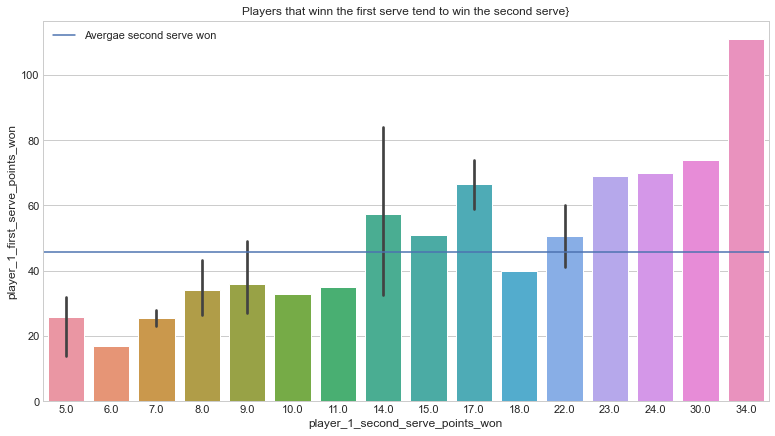

In [130]:
plt.title("Players that winn the first serve tend to win the second serve}")
sns.barplot(x="player_1_second_serve_points_won", y="player_1_first_serve_points_won", data=n_vs_r)
second_serve_points_won_mean = n_vs_r.player_1_first_serve_points_won.mean()
plt.axhline(second_serve_points_won_mean, label="Avergae second serve won")
plt.legend()
plt.show()